## XRAY-Classification (PNEUMONIA)

# CLIP

In [ ]:
import torch
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import itertools
import pandas as pd

# Load model and processor
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

# Load dataset
dataset = load_dataset('trpakov/chest-xray-classification', 'full')
class_names = dataset['test'].features['labels'].names  # ['NORMAL', 'PNEUMONIA']

# Prompt bags
normal_prompts = [
    "a chest X-ray of healthy lungs",
    "a chest radiograph showing no abnormalities",
    "a medical X-ray image of a healthy thorax",
    "a chest X-ray with no signs of infection",
    "a lung X-ray showing clear lung fields",
    "a radiograph with no pulmonary opacities",
    "a normal chest X-ray with no pathology",
    "a chest scan showing healthy lungs",
]

pneumonia_prompts = [
    "a chest X-ray showing pneumonia",
    "a lung radiograph with signs of pneumonia",
    "a chest X-ray with visible lung infection",
    "a thoracic X-ray showing pulmonary opacities",
    "an X-ray of lungs with consolidation",
    "a chest radiograph showing bilateral pneumonia",
    "a medical image of lungs affected by pneumonia",
    "a chest scan showing signs of pneumonia",
]


results = []
combinations = list(itertools.product(normal_prompts, pneumonia_prompts))
print(f"🧪 Evaluating {len(combinations)} prompt combinations...\n")

for normal_prompt, pneumonia_prompt in tqdm(combinations, desc="Evaluating"):
    text_prompts = [normal_prompt, pneumonia_prompt]
    y_true, y_pred = [], []

    for example in dataset['test']:
        image = example['image']
        true_label = example['labels'] 

        inputs = processor(images=image, text=text_prompts, return_tensors="pt", padding=True).to(device)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)
        pred_label = probs.argmax().item()

        y_true.append(true_label)
        y_pred.append(pred_label)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results.append({
        "normal_prompt": normal_prompt,
        "pneumonia_prompt": pneumonia_prompt,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm.tolist()
    })

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="f1_score", ascending=False)

print("\n🏆 Top 5 prompt combinations by F1 score:")
for i, row in df_sorted.head(5).iterrows():
    print(f"\n🔹 Combination #{i+1}")
    print(f"Normal prompt   : {row['normal_prompt']}")
    print(f"Pneumonia prompt: {row['pneumonia_prompt']}")
    print(f"Accuracy        : {row['accuracy']:.4f}")
    print(f"Precision       : {row['precision']:.4f}")
    print(f"Recall          : {row['recall']:.4f}")
    print(f"F1 Score        : {row['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{row['confusion_matrix']}")




🧪 Evaluating 64 prompt combinations...



Evaluating:   9%|▉         | 6/64 [00:57<09:14,  9.56s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Evaluating:  19%|█▉        | 12/64 [01:54<08:20,  9.63s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Evaluating:  22%|██▏       | 14/64 [02:14<08:08,  9.76s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-def


🏆 Top 5 prompt combinations by F1 score:

🔹 Combination #41
Normal prompt   : a radiograph with no pulmonary opacities
Pneumonia prompt: a chest X-ray showing pneumonia
Accuracy        : 0.5962
Precision       : 0.3947
Recall          : 0.7018
F1 Score        : 0.5053
Confusion Matrix:
[[227, 184], [51, 120]]

🔹 Combination #9
Normal prompt   : a chest radiograph showing no abnormalities
Pneumonia prompt: a chest X-ray showing pneumonia
Accuracy        : 0.4416
Precision       : 0.3409
Recall          : 0.9649
F1 Score        : 0.5038
Confusion Matrix:
[[92, 319], [6, 165]]

🔹 Combination #25
Normal prompt   : a chest X-ray with no signs of infection
Pneumonia prompt: a chest X-ray showing pneumonia
Accuracy        : 0.3918
Precision       : 0.3223
Recall          : 0.9708
F1 Score        : 0.4840
Confusion Matrix:
[[62, 349], [5, 166]]

🔹 Combination #42
Normal prompt   : a radiograph with no pulmonary opacities
Pneumonia prompt: a lung radiograph with signs of pneumonia
Accuracy    

# PUBMed

In [2]:
import torch
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import itertools
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "flaviagiammarino/pubmed-clip-vit-base-patch32"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

dataset = load_dataset('trpakov/chest-xray-classification', 'full')
class_names = dataset['test'].features['labels'].names

# Prompt bags
normal_prompts = [
    "a chest X-ray of healthy lungs",
    "a chest radiograph showing no abnormalities",
    "a medical X-ray image of a healthy thorax",
    "a chest X-ray with no signs of infection",
    "a lung X-ray showing clear lung fields",
    "a radiograph with no pulmonary opacities",
    "a normal chest X-ray with no pathology",
    "a chest scan showing healthy lungs",
]

pneumonia_prompts = [
    "a chest X-ray showing pneumonia",
    "a lung radiograph with signs of pneumonia",
    "a chest X-ray with visible lung infection",
    "a thoracic X-ray showing pulmonary opacities",
    "an X-ray of lungs with consolidation",
    "a chest radiograph showing bilateral pneumonia",
    "a medical image of lungs affected by pneumonia",
    "a chest scan showing signs of pneumonia",
]

results = []
combinations = list(itertools.product(normal_prompts, pneumonia_prompts))
print(f"🧪 Evaluating {len(combinations)} prompt combinations...\n")

for normal_prompt, pneumonia_prompt in tqdm(combinations, desc="Evaluating"):
    text_prompts = [normal_prompt, pneumonia_prompt]
    y_true, y_pred = [], []

    for example in dataset['test']:
        image = example['image']
        true_label = example['labels'] 

        inputs = processor(images=image, text=text_prompts, return_tensors="pt", padding=True).to(device)
        outputs = model(**inputs)
        logits_per_image = outputs.logits_per_image
        probs = logits_per_image.softmax(dim=1)
        pred_label = probs.argmax().item()

        y_true.append(true_label)
        y_pred.append(pred_label)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results.append({
        "normal_prompt": normal_prompt,
        "pneumonia_prompt": pneumonia_prompt,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm.tolist()
    })

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="f1_score", ascending=False)

print("\n🏆 Top 5 prompt combinations by F1 score:")
for i, row in df_sorted.head(5).iterrows():
    print(f"\n🔹 Combination #{i+1}")
    print(f"Normal prompt   : {row['normal_prompt']}")
    print(f"Pneumonia prompt: {row['pneumonia_prompt']}")
    print(f"Accuracy        : {row['accuracy']:.4f}")
    print(f"Precision       : {row['precision']:.4f}")
    print(f"Recall          : {row['recall']:.4f}")
    print(f"F1 Score        : {row['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{row['confusion_matrix']}")


🧪 Evaluating 64 prompt combinations...



Evaluating:   9%|▉         | 6/64 [00:59<09:28,  9.81s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Evaluating:  22%|██▏       | 14/64 [02:17<08:12,  9.85s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Evaluating:  34%|███▍      | 22/64 [03:35<06:48,  9.72s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-def


🏆 Top 5 prompt combinations by F1 score:

🔹 Combination #40
Normal prompt   : a lung X-ray showing clear lung fields
Pneumonia prompt: a chest scan showing signs of pneumonia
Accuracy        : 0.7715
Precision       : 0.5950
Recall          : 0.6959
F1 Score        : 0.6415
Confusion Matrix:
[[330, 81], [52, 119]]

🔹 Combination #37
Normal prompt   : a lung X-ray showing clear lung fields
Pneumonia prompt: an X-ray of lungs with consolidation
Accuracy        : 0.7320
Precision       : 0.5316
Recall          : 0.7368
F1 Score        : 0.6176
Confusion Matrix:
[[300, 111], [45, 126]]

🔹 Combination #33
Normal prompt   : a lung X-ray showing clear lung fields
Pneumonia prompt: a chest X-ray showing pneumonia
Accuracy        : 0.6186
Precision       : 0.4153
Recall          : 0.7310
F1 Score        : 0.5297
Confusion Matrix:
[[235, 176], [46, 125]]

🔹 Combination #34
Normal prompt   : a lung X-ray showing clear lung fields
Pneumonia prompt: a lung radiograph with signs of pneumonia
Accura

# CLIPMD

In [3]:
import torch
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import itertools
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "Idan0405/ClipMD"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model.to(device).eval()

dataset = load_dataset('trpakov/chest-xray-classification', 'full')
class_names = dataset['test'].features['labels'].names

normal_prompts = [
    "a chest X-ray of healthy lungs",
    "a chest radiograph showing no abnormalities",
    "a medical X-ray image of a healthy thorax",
    "a chest X-ray with no signs of infection",
    "a lung X-ray showing clear lung fields",
]

pneumonia_prompts = [
    "a chest X-ray showing pneumonia",
    "a lung radiograph with signs of pneumonia",
    "a chest X-ray with visible lung infection",
    "a thoracic X-ray showing pulmonary opacities",
    "an X-ray of lungs with consolidation",
]

results = []
combinations = list(itertools.product(normal_prompts, pneumonia_prompts))
print(f"EVALUATING {len(combinations)} prompt combinations...\n")

for normal_prompt, pneumonia_prompt in tqdm(combinations, desc="Evaluating"):
    text_prompts = [normal_prompt, pneumonia_prompt]
    y_true, y_pred = [], []

    for example in dataset['test']:
        image = example['image']
        true_label = example['labels']

        inputs = processor(
            text=text_prompts,
            images=[image],
            return_tensors="pt",
            padding=True
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            logits_per_image = outputs.logits_per_image
            pred_label = logits_per_image.argmax(dim=1).item()

        y_true.append(true_label)
        y_pred.append(pred_label)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results.append({
        "normal_prompt": normal_prompt,
        "pneumonia_prompt": pneumonia_prompt,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm.tolist()
    })

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="f1_score", ascending=False)

print("\nTOP 5 prompt combinations by F1 score:")
for i, row in df_sorted.head(5).iterrows():
    print(f"\n🔹 Combination #{i+1}")
    print(f"Normal prompt   : {row['normal_prompt']}")
    print(f"Pneumonia prompt: {row['pneumonia_prompt']}")
    print(f"Accuracy        : {row['accuracy']:.4f}")
    print(f"Precision       : {row['precision']:.4f}")
    print(f"Recall          : {row['recall']:.4f}")
    print(f"F1 Score        : {row['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{row['confusion_matrix']}")

EVALUATING 25 prompt combinations...



Evaluating: 100%|██████████| 25/25 [03:33<00:00,  8.53s/it]


TOP 5 prompt combinations by F1 score:

🔹 Combination #8
Normal prompt   : a chest radiograph showing no abnormalities
Pneumonia prompt: a chest X-ray with visible lung infection
Accuracy        : 0.2732
Precision       : 0.2789
Recall          : 0.9298
F1 Score        : 0.4291
Confusion Matrix:
[[0, 411], [12, 159]]

🔹 Combination #10
Normal prompt   : a chest radiograph showing no abnormalities
Pneumonia prompt: an X-ray of lungs with consolidation
Accuracy        : 0.3247
Precision       : 0.2840
Recall          : 0.8538
F1 Score        : 0.4263
Confusion Matrix:
[[43, 368], [25, 146]]

🔹 Combination #14
Normal prompt   : a medical X-ray image of a healthy thorax
Pneumonia prompt: a thoracic X-ray showing pulmonary opacities
Accuracy        : 0.3419
Precision       : 0.2863
Recall          : 0.8304
F1 Score        : 0.4258
Confusion Matrix:
[[57, 354], [29, 142]]

🔹 Combination #9
Normal prompt   : a chest radiograph showing no abnormalities
Pneumonia prompt: a thoracic X-ray showi

# BiomedCLIP

In [4]:
import torch
from datasets import load_dataset
from open_clip import create_model_from_pretrained, get_tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import itertools
import pandas as pd
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = create_model_from_pretrained("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
tokenizer = get_tokenizer("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
model.to(device).eval()

dataset = load_dataset('trpakov/chest-xray-classification', 'full')
class_names = dataset['test'].features['labels'].names

normal_prompts = [
    "a chest X-ray of healthy lungs",
    "a chest radiograph showing no abnormalities",
    "a medical X-ray image of a healthy thorax",
    "a chest X-ray with no signs of infection",
    "a lung X-ray showing clear lung fields",
    "a radiograph with no pulmonary opacities",
    "a normal chest X-ray with no pathology",
    "a chest scan showing healthy lungs",
]

pneumonia_prompts = [
    "a chest X-ray showing pneumonia",
    "a lung radiograph with signs of pneumonia",
    "a chest X-ray with visible lung infection",
    "a thoracic X-ray showing pulmonary opacities",
    "an X-ray of lungs with consolidation",
    "a chest radiograph showing bilateral pneumonia",
    "a medical image of lungs affected by pneumonia",
    "a chest scan showing signs of pneumonia",
]

results = []
combinations = list(itertools.product(normal_prompts, pneumonia_prompts))
print(f" EVALUATING {len(combinations)} prompt combinations...\n")

for normal_prompt, pneumonia_prompt in tqdm(combinations, desc="Evaluating"):
    text_prompts = [normal_prompt, pneumonia_prompt]
    y_true, y_pred = [], []

    texts = tokenizer(text_prompts, context_length=100).to(device)

    for example in dataset['test']:
        image = example['image']
        true_label = example['labels']

        image_tensor = preprocess(image).unsqueeze(0).to(device)

        with torch.no_grad():
            image_features, text_features, logit_scale = model(image_tensor, texts)
            logits = (logit_scale * image_features @ text_features.t()).softmax(dim=-1)
            pred_label = logits.argmax().item()

        y_true.append(true_label)
        y_pred.append(pred_label)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred)

    results.append({
        "normal_prompt": normal_prompt,
        "pneumonia_prompt": pneumonia_prompt,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm.tolist()
    })

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="f1_score", ascending=False)

print("\n TOP 5 prompt combinations by F1 score:")
for i, row in df_sorted.head(5).iterrows():
    print(f"\n🔹 Combination #{i+1}")
    print(f"Normal prompt   : {row['normal_prompt']}")
    print(f"Pneumonia prompt: {row['pneumonia_prompt']}")
    print(f"Accuracy        : {row['accuracy']:.4f}")
    print(f"Precision       : {row['precision']:.4f}")
    print(f"Recall          : {row['recall']:.4f}")
    print(f"F1 Score        : {row['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{row['confusion_matrix']}")

 EVALUATING 64 prompt combinations...



Evaluating: 100%|██████████| 64/64 [07:36<00:00,  7.13s/it]


 TOP 5 prompt combinations by F1 score:

🔹 Combination #58
Normal prompt   : a chest scan showing healthy lungs
Pneumonia prompt: a lung radiograph with signs of pneumonia
Accuracy        : 0.2148
Precision       : 0.2196
Recall          : 0.6550
F1 Score        : 0.3289
Confusion Matrix:
[[13, 398], [59, 112]]

🔹 Combination #26
Normal prompt   : a chest X-ray with no signs of infection
Pneumonia prompt: a lung radiograph with signs of pneumonia
Accuracy        : 0.2938
Precision       : 0.2196
Recall          : 0.5497
F1 Score        : 0.3139
Confusion Matrix:
[[77, 334], [77, 94]]

🔹 Combination #50
Normal prompt   : a normal chest X-ray with no pathology
Pneumonia prompt: a lung radiograph with signs of pneumonia
Accuracy        : 0.1478
Precision       : 0.1397
Recall          : 0.3684
F1 Score        : 0.2026
Confusion Matrix:
[[23, 388], [108, 63]]

🔹 Combination #62
Normal prompt   : a chest scan showing healthy lungs
Pneumonia prompt: a chest radiograph showing bilateral pneu

# BioVil-t

In [6]:
import torch
from datasets import load_dataset
from transformers import AutoModel, AutoTokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tqdm import tqdm
import itertools
import pandas as pd

device = "cuda" if torch.cuda.is_available() else "cpu"
url = "microsoft/BiomedVLP-BioViL-T"
tokenizer = AutoTokenizer.from_pretrained(url, trust_remote_code=True)
model = AutoModel.from_pretrained(url, trust_remote_code=True).to(device)

dataset = load_dataset('trpakov/chest-xray-classification', 'full')
class_names = dataset['test'].features['labels'].names

normal_prompts = [
    "No pleural effusion or pneumothorax is seen.",
    "There is no pneumothorax or pleural effusion.",
    "A normal chest X-ray with no pathology.",
    "A chest radiograph showing no abnormalities.",
]

pneumonia_prompts = [
    "Interval enlargement of pleural effusion.",
    "The extent of the pleural effusion is reduced.",
    "A lung radiograph with signs of pneumonia.",
    "An X-ray of lungs with consolidation.",
]

results = []
combinations = list(itertools.product(normal_prompts, pneumonia_prompts))
print(f"Evaluando {len(combinations)} combinaciones de prompts...\n")

for normal_prompt, pneumonia_prompt in tqdm(combinations, desc="Evaluando"):
    text_prompts = [normal_prompt, pneumonia_prompt]
    y_true, y_pred = [], []

    for example in dataset['test']:
        true_label = example['labels']

        with torch.no_grad():
            tokenizer_output = tokenizer.batch_encode_plus(
                batch_text_or_text_pairs=text_prompts,
                add_special_tokens=True,
                padding='longest',
                return_tensors='pt'
            ).to(device)

            embeddings = model.get_projected_text_embeddings(
                input_ids=tokenizer_output.input_ids,
                attention_mask=tokenizer_output.attention_mask
            )

            similarity_scores = torch.mm(embeddings, embeddings.t())
            pred_label = similarity_scores.argmax().item()

        y_true.append(true_label)
        y_pred.append(pred_label)

    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    cm = confusion_matrix(y_true, y_pred)

    results.append({
        "normal_prompt": normal_prompt,
        "pneumonia_prompt": pneumonia_prompt,
        "accuracy": acc,
        "precision": precision,
        "recall": recall,
        "f1_score": f1,
        "confusion_matrix": cm.tolist()
    })

df_results = pd.DataFrame(results)
df_sorted = df_results.sort_values(by="f1_score", ascending=False)

print("\n Top 5 combinaciones de prompts por F1 score:")
for i, row in df_sorted.head(5).iterrows():
    print(f"\n Combinación #{i+1}")
    print(f"Normal prompt   : {row['normal_prompt']}")
    print(f"Pneumonia prompt: {row['pneumonia_prompt']}")
    print(f"Accuracy        : {row['accuracy']:.4f}")
    print(f"Precision       : {row['precision']:.4f}")
    print(f"Recall          : {row['recall']:.4f}")
    print(f"F1 Score        : {row['f1_score']:.4f}")
    print(f"Confusion Matrix:\n{row['confusion_matrix']}")

Some weights of the model checkpoint at microsoft/BiomedVLP-BioViL-T were not used when initializing CXRBertModel: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing CXRBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing CXRBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Evaluando 16 combinaciones de prompts...



Evaluando:   0%|          | 0/16 [00:00<?, ?it/s]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
Evaluando:   6%|▋         | 1/16 [00:04<01:00,  4.01s/it]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.


 Top 5 combinaciones de prompts por F1 score:

 Combinación #1
Normal prompt   : No pleural effusion or pneumothorax is seen.
Pneumonia prompt: Interval enlargement of pleural effusion.
Accuracy        : 0.7062
Precision       : 0.3531
Recall          : 0.5000
F1 Score        : 0.4139
Confusion Matrix:
[[411, 0], [171, 0]]

 Combinación #5
Normal prompt   : There is no pneumothorax or pleural effusion.
Pneumonia prompt: Interval enlargement of pleural effusion.
Accuracy        : 0.7062
Precision       : 0.3531
Recall          : 0.5000
F1 Score        : 0.4139
Confusion Matrix:
[[411, 0], [171, 0]]

 Combinación #9
Normal prompt   : A normal chest X-ray with no pathology.
Pneumonia prompt: Interval enlargement of pleural effusion.
Accuracy        : 0.7062
Precision       : 0.3531
Recall          : 0.5000
F1 Score        : 0.4139
Confusion Matrix:
[[411, 0], [171, 0]]

 Combinación #10
Normal prompt   : A normal chest X-ray with no pathology.
Pneumonia prompt: The extent of the pleural 

## NIH CHEST X RAY

# CLIP

Evaluating CLIP: 100%|██████████| 25596/25596 [12:12<00:00, 34.93it/s]
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy : 0.0928
Precision   : 0.1071
Recall      : 0.0642
F1-score    : 0.0185


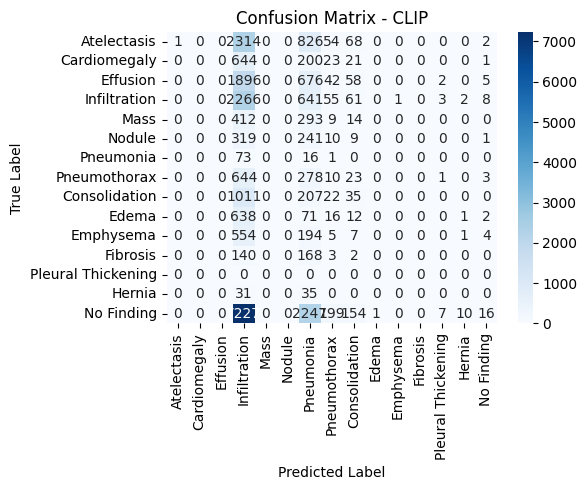


📋 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       1.00      0.00      0.00      3265
      Cardiomegaly       0.00      0.00      0.00       889
          Effusion       0.00      0.00      0.00      2679
      Infiltration       0.12      0.75      0.21      3037
              Mass       0.00      0.00      0.00       728
            Nodule       0.00      0.00      0.00       580
         Pneumonia       0.00      0.18      0.01        90
      Pneumothorax       0.02      0.01      0.01       959
     Consolidation       0.08      0.03      0.04      1275
             Edema       0.00      0.00      0.00       740
         Emphysema       0.00      0.00      0.00       765
          Fibrosis       0.00      0.00      0.00       313
Pleural Thickening       0.00      0.00      0.00         0
            Hernia       0.00      0.00      0.00        66
        No Finding       0.38      0.00      0.00      9861

          ac

c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [8]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from sklearn.metrics import classification_report

model_id = "openai/clip-vit-base-patch32"
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

ds = dataset = load_dataset("alkzar90/NIH-Chest-X-ray-dataset",'image-classification', trust_remote_code=True)

labels = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia", "No Finding"
]
text_prompts = [f"a chest X-ray showing {label.lower()}" for label in labels]

int2str = ds["test"].features["labels"].feature.int2str

y_true = []
y_pred = []

for example in tqdm(ds["test"], desc="Evaluating CLIP"):
    image = example["image"]
    label_indices = example["labels"] 

    if not label_indices:
        continue

    gt_label = int2str(label_indices[0])

    if gt_label not in labels:
        continue

    inputs = processor(images=image, text=text_prompts, return_tensors="pt", padding=True).to(device)
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)
    pred_idx = probs.argmax().item()
    pred_label = labels[pred_idx]

    y_true.append(gt_label)
    y_pred.append(pred_label)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
cm = confusion_matrix(y_true, y_pred, labels=labels)

print(f"\n✅ Accuracy : {acc:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1-score    : {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - CLIP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels))


# PUBMed

Evaluating PubMedCLIP: 100%|██████████| 25596/25596 [12:14<00:00, 34.86it/s]
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy : 0.1218
Precision   : 0.1170
Recall      : 0.0684
F1-score    : 0.0327


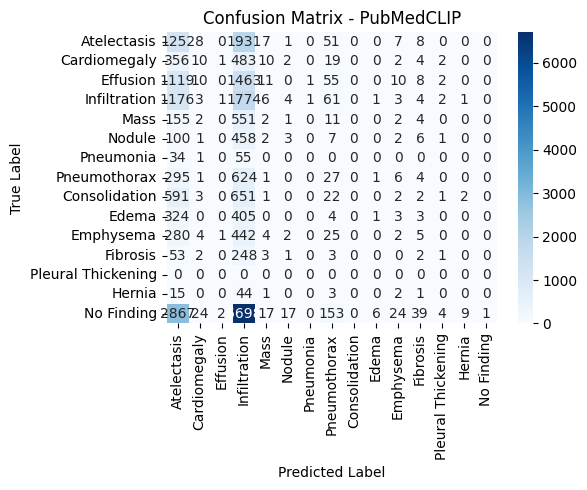


📋 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.15      0.38      0.21      3265
      Cardiomegaly       0.14      0.01      0.02       889
          Effusion       0.00      0.00      0.00      2679
      Infiltration       0.11      0.58      0.19      3037
              Mass       0.03      0.00      0.01       728
            Nodule       0.10      0.01      0.01       580
         Pneumonia       0.00      0.00      0.00        90
      Pneumothorax       0.06      0.03      0.04       959
     Consolidation       0.00      0.00      0.00      1275
             Edema       0.11      0.00      0.00       740
         Emphysema       0.03      0.00      0.00       765
          Fibrosis       0.02      0.01      0.01       313
Pleural Thickening       0.00      0.00      0.00         0
            Hernia       0.00      0.00      0.00        66
        No Finding       1.00      0.00      0.00      9861

          ac

c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [9]:
import torch
from transformers import CLIPProcessor, CLIPModel
from PIL import Image
from sklearn.metrics import accuracy_score
from tqdm import tqdm

model_id = "flaviagiammarino/pubmed-clip-vit-base-patch32"
device = "cuda" if torch.cuda.is_available() else "cpu"
model = CLIPModel.from_pretrained(model_id).to(device)
processor = CLIPProcessor.from_pretrained(model_id)

ds = dataset = load_dataset("alkzar90/NIH-Chest-X-ray-dataset",'image-classification', trust_remote_code=True)

labels = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia", "No Finding"
]
text_prompts = [f"a chest X-ray showing {label.lower()}" for label in labels]

int2str = ds["test"].features["labels"].feature.int2str

y_true = []
y_pred = []

for example in tqdm(ds["test"], desc="Evaluating PubMedCLIP"):
    image = example["image"]
    label_indices = example["labels"] 

    if not label_indices:
        continue

    gt_label = int2str(label_indices[0])

    if gt_label not in labels:
        continue 

    inputs = processor(images=image, text=text_prompts, return_tensors="pt", padding=True).to(device)
    outputs = model(**inputs)
    probs = outputs.logits_per_image.softmax(dim=1)
    pred_idx = probs.argmax().item()
    pred_label = labels[pred_idx]

    y_true.append(gt_label)
    y_pred.append(pred_label)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
cm = confusion_matrix(y_true, y_pred, labels=labels)

print(f"\n✅ Accuracy : {acc:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1-score    : {f1:.4f}")

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - PubMedCLIP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels))


# CLIPMD

Evaluating ClipMD: 100%|██████████| 25596/25596 [11:29<00:00, 37.11it/s]
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy : 0.0766
Precision   : 0.0852
Recall      : 0.0702
F1-score    : 0.0460


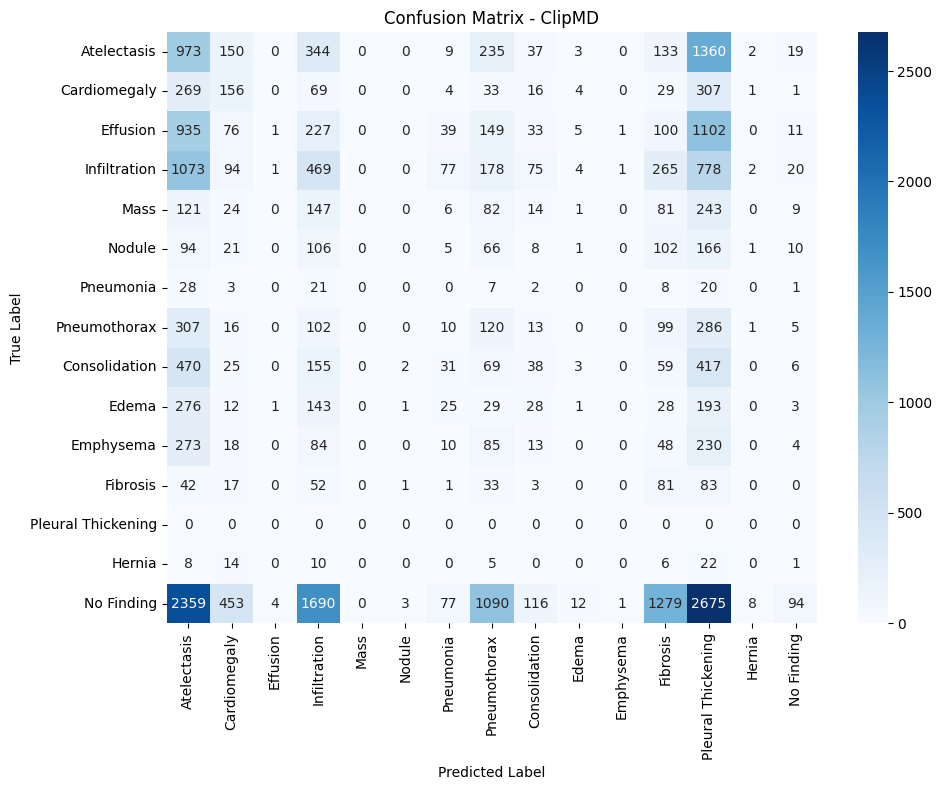


📋 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.13      0.30      0.19      3265
      Cardiomegaly       0.14      0.18      0.16       889
          Effusion       0.14      0.00      0.00      2679
      Infiltration       0.13      0.15      0.14      3037
              Mass       0.00      0.00      0.00       728
            Nodule       0.00      0.00      0.00       580
         Pneumonia       0.00      0.00      0.00        90
      Pneumothorax       0.06      0.13      0.08       959
     Consolidation       0.10      0.03      0.05      1275
             Edema       0.03      0.00      0.00       740
         Emphysema       0.00      0.00      0.00       765
          Fibrosis       0.03      0.26      0.06       313
Pleural Thickening       0.00      0.00      0.00         0
            Hernia       0.00      0.00      0.00        66
        No Finding       0.51      0.01      0.02      9861

          ac

c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitali

In [10]:
import torch
from datasets import load_dataset
from transformers import CLIPProcessor, CLIPModel
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model_id = "Idan0405/ClipMD"
model = CLIPModel.from_pretrained(model_id)
processor = CLIPProcessor.from_pretrained(model_id)
model.to(device).eval()

dataset = load_dataset("alkzar90/NIH-Chest-X-ray-dataset", 'image-classification', trust_remote_code=True)

labels = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia", "No Finding"
]
text_prompts = [f"a chest X-ray showing {label.lower()}" for label in labels]

int2str = dataset["test"].features["labels"].feature.int2str

y_true = []
y_pred = []

for example in tqdm(dataset["test"], desc="Evaluating ClipMD"):
    image = example["image"]
    label_indices = example["labels"]

    if not label_indices:
        continue

    gt_label = int2str(label_indices[0])

    if gt_label not in labels:
        continue 

    inputs = processor(
        text=text_prompts,
        images=image,
        return_tensors="pt",
        padding=True
    ).to(device)

    with torch.no_grad():
        outputs = model(**inputs)
        logits = outputs.logits_per_image.softmax(dim=1)
        pred_idx = logits.argmax().item()
        pred_label = labels[pred_idx]

    y_true.append(gt_label)
    y_pred.append(pred_label)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
cm = confusion_matrix(y_true, y_pred, labels=labels)

print(f"\n✅ Accuracy : {acc:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1-score    : {f1:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - ClipMD")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("clipmd_confusion_matrix.png")
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels))

# BiomedCLIP

Evaluating BiomedCLIP: 100%|██████████| 25596/25596 [15:09<00:00, 28.15it/s]
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



✅ Accuracy : 0.1537
Precision   : 0.1673
Recall      : 0.1469
F1-score    : 0.1026


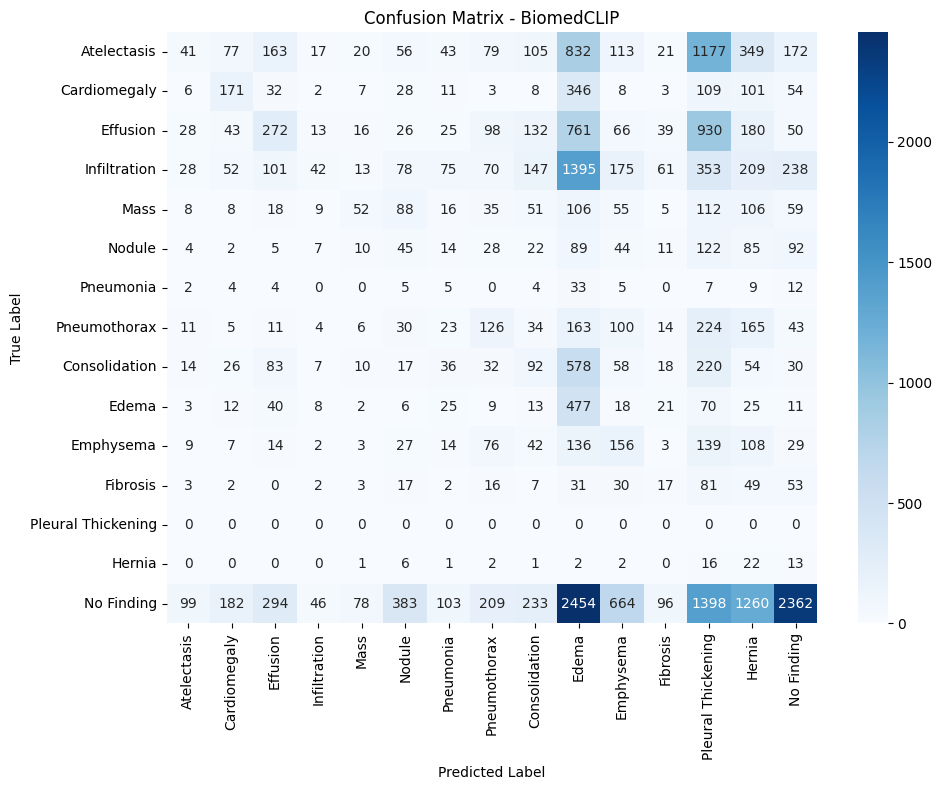


📋 Classification Report:
                    precision    recall  f1-score   support

       Atelectasis       0.16      0.01      0.02      3265
      Cardiomegaly       0.29      0.19      0.23       889
          Effusion       0.26      0.10      0.15      2679
      Infiltration       0.26      0.01      0.03      3037
              Mass       0.24      0.07      0.11       728
            Nodule       0.06      0.08      0.06       580
         Pneumonia       0.01      0.06      0.02        90
      Pneumothorax       0.16      0.13      0.14       959
     Consolidation       0.10      0.07      0.08      1275
             Edema       0.06      0.64      0.12       740
         Emphysema       0.10      0.20      0.14       765
          Fibrosis       0.06      0.05      0.05       313
Pleural Thickening       0.00      0.00      0.00         0
            Hernia       0.01      0.33      0.02        66
        No Finding       0.73      0.24      0.36      9861

          ac

c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [11]:
import torch
from datasets import load_dataset
from open_clip import create_model_from_pretrained, get_tokenizer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = create_model_from_pretrained("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
tokenizer = get_tokenizer("hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224")
model.to(device).eval()

dataset = load_dataset("alkzar90/NIH-Chest-X-ray-dataset", 'image-classification', trust_remote_code=True)

labels = [
    "Atelectasis", "Cardiomegaly", "Effusion", "Infiltration", "Mass",
    "Nodule", "Pneumonia", "Pneumothorax", "Consolidation", "Edema",
    "Emphysema", "Fibrosis", "Pleural Thickening", "Hernia", "No Finding"
]
text_prompts = [f"a chest X-ray showing {label.lower()}" for label in labels]

int2str = dataset["test"].features["labels"].feature.int2str

tokenized_text = tokenizer(text_prompts).to(device)

y_true = []
y_pred = []

for example in tqdm(dataset["test"], desc="Evaluating BiomedCLIP"):
    image = example["image"]
    label_indices = example["labels"] 

    if not label_indices:
        continue

    gt_label = int2str(label_indices[0])

    if gt_label not in labels:
        continue 

    image_tensor = preprocess(image).unsqueeze(0).to(device)

    with torch.no_grad():
        image_features, text_features, logit_scale = model(image_tensor, tokenized_text)
        logits = (logit_scale * image_features @ text_features.t()).softmax(dim=-1)
        pred_idx = logits.argmax().item()
        pred_label = labels[pred_idx]

    y_true.append(gt_label)
    y_pred.append(pred_label)

acc = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average="macro")
recall = recall_score(y_true, y_pred, average="macro")
f1 = f1_score(y_true, y_pred, average="macro")
cm = confusion_matrix(y_true, y_pred, labels=labels)

print(f"\n✅ Accuracy : {acc:.4f}")
print(f"Precision   : {precision:.4f}")
print(f"Recall      : {recall:.4f}")
print(f"F1-score    : {f1:.4f}")

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix - BiomedCLIP")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.savefig("biomedclip_confusion_matrix.png")
plt.show()

print("\n📋 Classification Report:")
print(classification_report(y_true, y_pred, labels=labels))

# BioVil-T

## VQA-RAD

# BLIP2

In [13]:
import torch
from PIL import Image
from datasets import load_dataset
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import evaluate
import nltk
from tqdm import tqdm
import pandas as pd

nltk.download("wordnet")
nltk.download("omw-1.4")

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl", device_map="cuda:0", torch_dtype=torch.float16
)
model.eval()

dataset = load_dataset("flaviagiammarino/vqa-rad")["test"]

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []

results = []

for idx, sample in enumerate(tqdm(dataset, desc="Procesando muestras")):
    image = sample["image"].convert("RGB")
    question = sample["question"]
    ground_truth = sample["answer"]

    inputs = processor(image, question, return_tensors="pt").to("cuda", torch.float16)
    output = model.generate(
        **inputs,
        max_new_tokens=10,
        do_sample=False,      
        num_beams=3,    
        repetition_penalty=1.2,    
        length_penalty=0.8         
    )
    pred = processor.decode(output[0], skip_special_tokens=True).strip()

    em_scores.append(exact_match(pred, ground_truth))
    bleu_preds.append(pred)
    bleu_refs.append([ground_truth])
    meteor_preds.append(pred)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": pred,
        "ground_truth": ground_truth
    })

em = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- Results ---")
print(f"Exact Match: {em:.4f}")
print(f"BLEU-1: {bleu_score:.4f}")
print(f"METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("vqa_rad_blip2_resultados.csv", index=False)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Procesando muestras: 100%|██████████| 451/451 [02:19<00:00,  3.23it/s]



--- Results ---
Exact Match: 0.0421
BLEU-1: 0.0000
METEOR: 0.0555


# BiomedCLIP

In [14]:
import torch
import torch.nn.functional as F
from datasets import load_dataset
from PIL import Image
from tqdm import tqdm
import pandas as pd
import evaluate
import nltk
import re

import open_clip
from torchvision import transforms

nltk.download("wordnet")
nltk.download("omw-1.4")

model_name = 'hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224'
model, _, preprocess = open_clip.create_model_and_transforms(model_name, device='cuda')
tokenizer = open_clip.get_tokenizer(model_name)

dataset = load_dataset("flaviagiammarino/vqa-rad")["test"]

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

yes_no = ["yes", "no"]
sides = ["left", "right", "both", "neither"]
locations = ["abdomen", "pelvis", "chest", "lung", "colon", "heart", "kidney"]
generic = ["normal", "abnormal", "present", "not present", "not seen", "seen"]

def get_candidate_answers(question):
    q = question.lower()
    if q.startswith(("is", "are", "was", "were", "does", "do")):
        return yes_no
    elif re.search(r"(side|left|right)", q):
        return sides
    elif re.search(r"(where|location|area)", q):
        return locations
    elif re.search(r"(organ|structure|prominent|border|abnormality|opacity)", q):
        return generic
    else:
        return yes_no + sides + generic

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []
results = []

for idx, sample in enumerate(tqdm(dataset, desc="Procesando muestras")):
    image = sample["image"].convert("RGB")
    question = sample["question"]
    ground_truth = sample["answer"]

    image_tensor = preprocess(image).unsqueeze(0).to("cuda")

    with torch.no_grad():
        image_features = model.encode_image(image_tensor)
        image_features = F.normalize(image_features, dim=-1)

    candidate_answers = get_candidate_answers(question)
    prompts = [f"{question} Answer: {ans}" for ans in candidate_answers]

    tokenized = tokenizer(prompts).to("cuda")

    with torch.no_grad():
        text_features = model.encode_text(tokenized)
        text_features = F.normalize(text_features, dim=-1)

    sims = image_features @ text_features.T  
    best_idx = sims.argmax().item()
    best_answer = candidate_answers[best_idx]

    em = exact_match(best_answer, ground_truth)
    em_scores.append(em)
    bleu_preds.append(best_answer)
    bleu_refs.append([ground_truth])
    meteor_preds.append(best_answer)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": best_answer,
        "ground_truth": ground_truth,
        "exact_match": em
    })

em_final = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- Results---")
print(f"Exact Match: {em_final:.4f}")
print(f"BLEU-1: {bleu_score:.4f}")
print(f"METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("biomedclip_vqa_resultado.csv", index=False)



[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Procesando muestras: 100%|██████████| 451/451 [00:09<00:00, 46.58it/s]



--- Results---
Exact Match: 0.2927
BLEU-1: 0.0000
METEOR: 0.1488


# GiT

In [15]:
import torch
from PIL import Image
from datasets import load_dataset
from transformers import AutoProcessor, AutoModelForCausalLM
import evaluate
import nltk
from tqdm import tqdm
import pandas as pd

nltk.download("wordnet")
nltk.download("omw-1.4")

model_id = "microsoft/git-large"
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda:0",
    torch_dtype=torch.float16
).eval()

dataset = load_dataset("flaviagiammarino/vqa-rad")["test"]

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []
results = []

print("🚀 Ejecutando VQA con GIT...\n")
for idx, sample in enumerate(tqdm(dataset, desc="Procesando muestras")):
    image = sample["image"].convert("RGB")
    question = sample["question"]
    ground_truth = sample["answer"]

    prompt = f"Question: {question}\nAnswer:"
    inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        output_ids = model.generate(**inputs, max_new_tokens=50)

    prediction = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()

    if "answer:" in prediction.lower():
        prediction = prediction.lower().split("answer:")[-1].strip()

    em_scores.append(exact_match(prediction, ground_truth))
    bleu_preds.append(prediction)
    bleu_refs.append([ground_truth])
    meteor_preds.append(prediction)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": prediction,
        "ground_truth": ground_truth,
        "exact_match": exact_match(prediction, ground_truth)
    })

em = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- 📊 Results ---")
print(f"✅ Exact Match: {em:.4f}")
print(f"📘 BLEU-1: {bleu_score:.4f}")
print(f"📘 METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("git_vqa_resultado.csv", index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


🚀 Ejecutando VQA con GIT...



Procesando muestras: 100%|██████████| 451/451 [00:15<00:00, 29.74it/s]



--- 📊 Results ---
✅ Exact Match: 0.0000
📘 BLEU-1: 0.0000
📘 METEOR: 0.0240


# SmolVLM

In [22]:
import torch
import pandas as pd
from datasets import load_dataset
from transformers import AutoProcessor, AutoModelForVision2Seq, BitsAndBytesConfig
from tqdm import tqdm
import random
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
import re

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

quantization_config = BitsAndBytesConfig(load_in_4bit=False)

processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct"
).to(DEVICE)

print("Loading VQA-RAD dataset...")
dataset = load_dataset('flaviagiammarino/vqa-rad')

sample_size = 200
random.seed(42) 
sample_indices = random.sample(range(len(dataset['train'])), sample_size)
limited_dataset = dataset['train'].select(sample_indices)

print(f"Using a sample of {sample_size} examples from the VQA-RAD dataset")

def normalize_text(text):
    """Normalizes text for evaluation."""
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)
    return text

def calculate_exact_match(true_answer, pred_answer):
    """Calculates if there is an exact match between answers."""
    return normalize_text(true_answer) == normalize_text(pred_answer)

def calculate_bleu(true_answer, pred_answer):
    """Calculates the BLEU score between answers."""
    reference = [normalize_text(true_answer).split()]
    hypothesis = normalize_text(pred_answer).split()

    if len(hypothesis) == 0:
        return 0.0
    if len(reference[0]) == 0:
        return 0.0

    weights = (0.5, 0.5, 0, 0)

    try:
        return sentence_bleu(reference, hypothesis, weights=weights)
    except Exception as e:
        print(f"Error in BLEU: {e}, ref={reference}, hyp={hypothesis}")
        return 0.0

def calculate_meteor(true_answer, pred_answer):
    """Calculates the METEOR score between answers."""
    reference = [normalize_text(true_answer)]
    hypothesis = normalize_text(pred_answer)

    try:
        return meteor_score(reference, hypothesis)
    except Exception as e:
        print(f"Error in METEOR: {e}, ref={reference}, hyp={hypothesis}")
        return 0.0

def extract_assistant_response(text):
    """Extracts only the assistant's response part from the generated text."""
    if "Assistant:" in text:
        return text.split("Assistant:")[-1].strip()
    return text.strip()

results = []

print("Evaluating the model on radiological VQA questions...\n")

for example in tqdm(limited_dataset, desc="Processing examples"):
    image = example['image']
    question = example['question']
    true_answer = example['answer'].lower()

    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": f"Please answer this question shortly about the medical image, be very concise: {question}"}
            ]
        }
    ]

    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt").to(DEVICE)

    generated_ids = model.generate(**inputs, max_new_tokens=10)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]

    predicted_answer = extract_assistant_response(generated_text)

    exact_match = calculate_exact_match(true_answer, predicted_answer)
    bleu_score = calculate_bleu(true_answer, predicted_answer)
    meteor_score = calculate_meteor(true_answer, predicted_answer)

    results.append({
        "question": question,
        "true_answer": true_answer,
        "predicted_answer": predicted_answer,
        "exact_match": exact_match,
        "bleu_score": bleu_score,
        "meteor_score": meteor_score
    })

df_results = pd.DataFrame(results)

avg_exact_match = df_results['exact_match'].mean()
avg_bleu = df_results['bleu_score'].mean()
avg_meteor = df_results['meteor_score'].mean()

print("\nVisual QA Evaluation Results:")
print(f"Exact Match: {avg_exact_match:.4f}")
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"METEOR Score: {avg_meteor:.4f}")

print("\nPrediction Examples:")
for i, row in df_results.head(50).iterrows():
    print(f"\nQuestion: {row['question']}")
    print(f"Dataset answer: {row['true_answer']}")
    print(f"Model answer: {row['predicted_answer']}")

df_results.to_csv("vqa_rad_results.csv", index=False)
print("\nResults saved in 'vqa_rad_results.csv'")

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


model.safetensors:   0%|          | 0.00/513M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/136 [00:00<?, ?B/s]

Loading VQA-RAD dataset...
Using a sample of 200 examples from the VQA-RAD dataset
Evaluating the model on radiological VQA questions...



Processing examples:   0%|          | 0/200 [00:00<?, ?it/s]c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
c:\Users\Tech4Diet\anaconda3\envs\clip_torch_env\lib\site-packages\nltk\translate\bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, indepen

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image appears to show the left side of the, ref=['left apical pneumothorax'], hyp=the image appears to show the left side of the


Processing examples:   1%|          | 2/200 [00:02<03:10,  1.04it/s]

Error in METEOR: 'float' object is not callable, ref=['mri'], hyp=mri is a medical image modality.


Processing examples:   2%|▏         | 3/200 [00:02<02:54,  1.13it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the kidneys are visible in this image.


Processing examples:   2%|▏         | 4/200 [00:03<02:49,  1.16it/s]

Error in METEOR: 'float' object is not callable, ref=['right sided aortic arch'], hyp=there is a biliopancreaticar


Processing examples:   2%|▎         | 5/200 [00:04<02:44,  1.18it/s]

Error in METEOR: 'float' object is not callable, ref=['retrocardiac'], hyp=the abnormality in this image is located in the left


Processing examples:   3%|▎         | 6/200 [00:05<02:36,  1.24it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no pleural effusion in


Processing examples:   4%|▎         | 7/200 [00:05<02:32,  1.26it/s]

Error in METEOR: 'float' object is not callable, ref=['basal ganglia'], hyp=the brain region that demonstrates edema is the basal gang


Processing examples:   4%|▍         | 8/200 [00:06<02:35,  1.23it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a pneumothorax present


Processing examples:   4%|▍         | 9/200 [00:07<02:33,  1.25it/s]

Error in METEOR: 'float' object is not callable, ref=['chest x-ray'], hyp=this is a chest x-ray.


Processing examples:   5%|▌         | 10/200 [00:08<02:29,  1.27it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=there is an aneurysmal enlargement of the abdominal aorta


Processing examples:   6%|▌         | 11/200 [00:08<02:19,  1.36it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a large area of the abdomen


Processing examples:   6%|▌         | 12/200 [00:09<02:14,  1.40it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this chest x ray was taken in pa


Processing examples:   6%|▋         | 13/200 [00:10<02:09,  1.45it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the gallbladder is not large in size.


Processing examples:   7%|▋         | 14/200 [00:10<01:58,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['mixed intensity'], hyp=mixed intensity.


Processing examples:   8%|▊         | 15/200 [00:11<01:57,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, this patient did not sustain any physical damage


Processing examples:   8%|▊         | 16/200 [00:12<01:58,  1.56it/s]

Error in METEOR: 'float' object is not callable, ref=['cortical ribbon of right occipital lobe with extension into right posterior temporal lobe'], hyp=the hyperintensitites are located in the


Processing examples:   8%|▊         | 17/200 [00:12<01:56,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the trachea is deviated.


Processing examples:   9%|▉         | 18/200 [00:13<01:55,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['mri/flair'], hyp=mri (mammography)


Processing examples:  10%|▉         | 19/200 [00:13<01:54,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the mass has a smooth appearing border.


Processing examples:  10%|█         | 20/200 [00:14<01:54,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the heart and lungs are displayed well in


Processing examples:  10%|█         | 21/200 [00:15<01:53,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['flair'], hyp=the t1 weighted image is.


Processing examples:  11%|█         | 22/200 [00:15<02:00,  1.48it/s]

Error in METEOR: 'float' object is not callable, ref=['left'], hyp=the left side of the cardiac border is more prominent


Processing examples:  12%|█▏        | 23/200 [00:16<02:07,  1.39it/s]

Error in METEOR: 'float' object is not callable, ref=['medical process'], hyp=medical process.


Processing examples:  12%|█▏        | 24/200 [00:17<02:24,  1.22it/s]

Error in METEOR: 'float' object is not callable, ref=['pa'], hyp=the film is laterally positioned.


Processing examples:  12%|█▎        | 25/200 [00:18<02:38,  1.10it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no medical indication of a pulmonary


Processing examples:  13%|█▎        | 26/200 [00:20<02:53,  1.00it/s]

Error in METEOR: 'float' object is not callable, ref=['sigmoid flexture of the colon'], hyp=sigmoid flexture of the colon.


Processing examples:  14%|█▎        | 27/200 [00:21<02:52,  1.00it/s]

Error in METEOR: 'float' object is not callable, ref=['congenital developmental disorder? history of surgery and past manipulation?'], hyp=congenital developmental disorder and autism spectrum disorder?


Processing examples:  14%|█▍        | 28/200 [00:22<02:45,  1.04it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, it can.


Processing examples:  14%|█▍        | 29/200 [00:23<02:44,  1.04it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this is an mri.


Processing examples:  15%|█▌        | 30/200 [00:24<02:51,  1.01s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the image is enlarged.


Processing examples:  16%|█▌        | 31/200 [00:25<02:51,  1.01s/it]

Error in METEOR: 'float' object is not callable, ref=['pa'], hyp=the parietal bone is in the apical


Processing examples:  16%|█▌        | 32/200 [00:26<03:00,  1.07s/it]

Error in METEOR: 'float' object is not callable, ref=['abscess'], hyp=abscess in the right occipital lobe.


Processing examples:  16%|█▋        | 33/200 [00:27<03:04,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=yes, the abdominal fat pads are present in the


Processing examples:  17%|█▋        | 34/200 [00:28<03:01,  1.09s/it]

Error in METEOR: 'float' object is not callable, ref=['ring-enhancing lesion'], hyp=the lesion appears as a bright area in the right


Processing examples:  18%|█▊        | 35/200 [00:29<03:03,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no perforation visible in this


Processing examples:  18%|█▊        | 36/200 [00:30<03:02,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no indication of cardiomeg


Processing examples:  18%|█▊        | 37/200 [00:31<02:42,  1.00it/s]

Error in METEOR: 'float' object is not callable, ref=['bilateral frontal lobes'], hyp=left cerebellum


Processing examples:  19%|█▉        | 38/200 [00:32<02:51,  1.06s/it]

Error in METEOR: 'float' object is not callable, ref=['t2 weighted'], hyp=the image is a mri (magnetic resonance imaging


Processing examples:  20%|█▉        | 39/200 [00:34<02:57,  1.10s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no pneumothorax in


Processing examples:  20%|██        | 40/200 [00:35<02:56,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['2'], hyp=there are two kidneys in this image.


Processing examples:  20%|██        | 41/200 [00:35<02:43,  1.03s/it]

Error in METEOR: 'float' object is not callable, ref=['chest xray'], hyp=a. chest xray.


Processing examples:  21%|██        | 42/200 [00:36<02:39,  1.01s/it]

Error in METEOR: 'float' object is not callable, ref=['irregular'], hyp=it is irregular in contour.


Processing examples:  22%|██▏       | 43/200 [00:38<02:43,  1.04s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the trachea is not shifted in this


Processing examples:  22%|██▏       | 44/200 [00:39<02:44,  1.06s/it]

Error in METEOR: 'float' object is not callable, ref=['short section irregular contour'], hyp=the r vertebral artery is an irregularly shaped,


Processing examples:  22%|██▎       | 45/200 [00:40<02:51,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this is a chest radiograph.


Processing examples:  23%|██▎       | 46/200 [00:41<02:37,  1.02s/it]

Error in METEOR: 'float' object is not callable, ref=['heterogeneous'], hyp=heterogeneous.


Processing examples:  24%|██▎       | 47/200 [00:42<02:34,  1.01s/it]

Error in METEOR: 'float' object is not callable, ref=['aorta enhancement'], hyp=contrast is used to allow for better visibility of the


Processing examples:  24%|██▍       | 48/200 [00:42<02:22,  1.07it/s]

Error in METEOR: 'float' object is not callable, ref=['6.5 x 6.2 x 8.8cm'], hyp=the mass is large.


Processing examples:  24%|██▍       | 49/200 [00:44<02:37,  1.04s/it]

Error in METEOR: 'float' object is not callable, ref=['adenopathy'], hyp=there is an infection in the right lung.


Processing examples:  25%|██▌       | 50/200 [00:45<02:27,  1.01it/s]

Error in METEOR: 'float' object is not callable, ref=['left'], hyp=left side


Processing examples:  26%|██▌       | 51/200 [00:46<02:32,  1.02s/it]

Error in METEOR: 'float' object is not callable, ref=['right upper lobe'], hyp=the lesion is located on the left side of the


Processing examples:  26%|██▌       | 52/200 [00:47<02:36,  1.06s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no damage to the liver in


Processing examples:  26%|██▋       | 53/200 [00:48<02:37,  1.07s/it]

Error in METEOR: 'float' object is not callable, ref=['left'], hyp=the trachea is deviating to the right in


Processing examples:  27%|██▋       | 54/200 [00:49<02:37,  1.08s/it]

Error in METEOR: 'float' object is not callable, ref=['moderate edema'], hyp=there is an area of bright light in the right


Processing examples:  28%|██▊       | 55/200 [00:50<02:32,  1.05s/it]

Error in METEOR: 'float' object is not callable, ref=['5.6cm focal, predominantly hypodense'], hyp=5.6%.


Processing examples:  28%|██▊       | 56/200 [00:51<02:39,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no pneumothorax in


Processing examples:  28%|██▊       | 57/200 [00:52<02:40,  1.12s/it]

Error in METEOR: 'float' object is not callable, ref=['mri-flair'], hyp=this is an axial (axial) mri image.


Processing examples:  29%|██▉       | 58/200 [00:53<02:33,  1.08s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there are no evidence of any hypo-


Processing examples:  30%|██▉       | 59/200 [00:55<02:35,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['right superior cavoatrial junction'], hyp=the catheter tip is located in the superior vena


Processing examples:  30%|███       | 60/200 [00:56<02:36,  1.11s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the medulla is swollen.


Processing examples:  30%|███       | 61/200 [00:57<02:25,  1.05s/it]

Error in METEOR: 'float' object is not callable, ref=['emphysema'], hyp=emphysema.


Processing examples:  31%|███       | 62/200 [00:57<02:10,  1.06it/s]

Error in METEOR: 'float' object is not callable, ref=['less enhancement'], hyp=less acute means less inflammation.


Processing examples:  32%|███▏      | 63/200 [00:58<01:56,  1.17it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no.


Processing examples:  32%|███▏      | 64/200 [00:59<01:52,  1.21it/s]

Error in METEOR: 'float' object is not callable, ref=['infarcted areas'], hyp=there are several hyperintensities to the right


Processing examples:  32%|███▎      | 65/200 [00:59<01:46,  1.27it/s]

Error in METEOR: 'float' object is not callable, ref=['abnormal hyperintensity in the right occipital lobe'], hyp=the image shows an abnormality in the brain's right


Processing examples:  33%|███▎      | 66/200 [01:00<01:39,  1.35it/s]

Error in METEOR: 'float' object is not callable, ref=['air'], hyp=the black on an x ray indicates air.


Processing examples:  34%|███▎      | 67/200 [01:01<01:36,  1.38it/s]

Error in METEOR: 'float' object is not callable, ref=['cxr'], hyp=the image is a chest x-ray.


Processing examples:  34%|███▍      | 68/200 [01:01<01:29,  1.47it/s]

Error in METEOR: 'float' object is not callable, ref=['parietal and occipital lobes'], hyp=cns and pca


Processing examples:  34%|███▍      | 69/200 [01:02<01:27,  1.50it/s]

Error in METEOR: 'float' object is not callable, ref=['right side of the trachea'], hyp=the abnormality is in the right side of the trache


Processing examples:  35%|███▌      | 70/200 [01:03<01:31,  1.42it/s]

Error in METEOR: 'float' object is not callable, ref=['left lobe mass 1.5 x 1.8 cm'], hyp=the image appears to show a right lobe mass lesion


Processing examples:  36%|███▌      | 71/200 [01:03<01:26,  1.49it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no


Processing examples:  36%|███▌      | 72/200 [01:04<01:32,  1.38it/s]

Error in METEOR: 'float' object is not callable, ref=['non-enhanced'], hyp=the csf enhancement is characterized by a bright area


Processing examples:  36%|███▋      | 73/200 [01:05<01:30,  1.41it/s]

Error in METEOR: 'float' object is not callable, ref=['chest x ray'], hyp=chest x ray.


Processing examples:  37%|███▋      | 74/200 [01:06<01:29,  1.42it/s]

Error in METEOR: 'float' object is not callable, ref=['mr - flair'], hyp=mr - flair.


Processing examples:  38%|███▊      | 75/200 [01:08<02:22,  1.14s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, cardiomegaly was shown in this


Processing examples:  38%|███▊      | 76/200 [01:10<03:15,  1.58s/it]

Error in METEOR: 'float' object is not callable, ref=['fat stranding around the appendix, thickened appendiceal walls, dilated appendix, and an appendicolith is seen as well'], hyp=the signs of appendicitis seen in this image


Processing examples:  38%|███▊      | 77/200 [01:13<03:56,  1.92s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is oral contrast located in the colon


Processing examples:  39%|███▉      | 78/200 [01:16<04:24,  2.17s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no evidence of intraparen


Processing examples:  40%|███▉      | 79/200 [01:18<04:40,  2.32s/it]

Error in METEOR: 'float' object is not callable, ref=['multiple sclerosis'], hyp=the pathology seen in this image is typical of multiple


Processing examples:  40%|████      | 80/200 [01:21<04:58,  2.49s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the trachea is midline.


Processing examples:  40%|████      | 81/200 [01:23<04:32,  2.29s/it]

Error in METEOR: 'float' object is not callable, ref=['left temporal horn'], hyp=the mass is located in the right temporal lobe.


Processing examples:  41%|████      | 82/200 [01:24<03:33,  1.81s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no.


Processing examples:  42%|████▏     | 83/200 [01:25<02:52,  1.47s/it]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is bilateral hilar enlargement.


Processing examples:  42%|████▏     | 84/200 [01:25<02:29,  1.29s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=yes, this is an anterior-posterior image


Processing examples:  42%|████▎     | 85/200 [01:26<02:12,  1.15s/it]

Error in METEOR: 'float' object is not callable, ref=['ring enhancing lesion'], hyp=the lesion appears bright and is likely an edema lesion


Processing examples:  43%|████▎     | 86/200 [01:27<02:03,  1.08s/it]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no skull fracture in this image


Processing examples:  44%|████▎     | 87/200 [01:28<01:46,  1.07it/s]

Error in METEOR: 'float' object is not callable, ref=['haustra'], hyp=haustra are located on the left side of


Processing examples:  44%|████▍     | 88/200 [01:29<01:41,  1.11it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a shift of midline structures


Processing examples:  44%|████▍     | 89/200 [01:29<01:29,  1.24it/s]

Error in METEOR: 'float' object is not callable, ref=['haustra'], hyp=haustra.


Processing examples:  45%|████▌     | 90/200 [01:30<01:29,  1.23it/s]

Error in METEOR: 'float' object is not callable, ref=['motor weakness, sensory deficits, and left neglect'], hyp=the lesion appears to have deficits in the right temporal


Processing examples:  46%|████▌     | 91/200 [01:31<01:26,  1.26it/s]

Error in METEOR: 'float' object is not callable, ref=['right subclavian vein'], hyp=the central venous catheter (cvc) is placed


Processing examples:  46%|████▌     | 92/200 [01:31<01:21,  1.32it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the vertebral arteries are patent in this section


Processing examples:  46%|████▋     | 93/200 [01:32<01:17,  1.37it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this is a chest x-ray.


Processing examples:  47%|████▋     | 94/200 [01:33<01:13,  1.45it/s]

Error in METEOR: 'float' object is not callable, ref=['loculated'], hyp=there are lesions in the cerebellum.


Processing examples:  48%|████▊     | 95/200 [01:33<01:08,  1.53it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, diffuse cerebral edema is not present in this


Processing examples:  48%|████▊     | 96/200 [01:34<01:08,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the descending aortic silhouette of normal contour.


Processing examples:  48%|████▊     | 97/200 [01:35<01:07,  1.53it/s]

Error in METEOR: 'float' object is not callable, ref=['spleen'], hyp=the liver is enlarged in this image.


Processing examples:  49%|████▉     | 98/200 [01:35<01:04,  1.59it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is thickening of the gastric wall.


Processing examples:  50%|████▉     | 99/200 [01:36<01:02,  1.62it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is gastric fullness.


Processing examples:  50%|█████     | 100/200 [01:36<01:01,  1.63it/s]

Error in METEOR: 'float' object is not callable, ref=['in the bowel'], hyp=yes, there is contrast present in the bowel.


Processing examples:  50%|█████     | 101/200 [01:37<01:03,  1.55it/s]

Error in METEOR: 'float' object is not callable, ref=['lung'], hyp=the image appears to show the lungs.


Processing examples:  51%|█████     | 102/200 [01:38<01:04,  1.51it/s]

Error in METEOR: 'float' object is not callable, ref=['ring enhancing lesion'], hyp=the occipital lobe is white.


Processing examples:  52%|█████▏    | 103/200 [01:38<01:03,  1.53it/s]

Error in METEOR: 'float' object is not callable, ref=['hydropneumothorax'], hyp=the right lung is very hydrated.


Processing examples:  52%|█████▏    | 104/200 [01:39<00:58,  1.63it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes.


Processing examples:  52%|█████▎    | 105/200 [01:40<01:00,  1.56it/s]

Error in METEOR: 'float' object is not callable, ref=['white versus grey matter brightness'], hyp=the brain is white and the brain tissue is grey


Processing examples:  53%|█████▎    | 106/200 [01:40<01:01,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['there is massive cerebral hemisphere edema'], hyp=there are no sulci seen in this image because


Processing examples:  54%|█████▎    | 107/200 [01:41<01:01,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a mass in this image.


Processing examples:  54%|█████▍    | 108/200 [01:42<01:01,  1.49it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the appendix is not seen in this image


Processing examples:  55%|█████▍    | 109/200 [01:42<01:03,  1.44it/s]

Error in METEOR: 'float' object is not callable, ref=['scoliosis'], hyp=these wide undulations are called scoliosis.


Processing examples:  55%|█████▌    | 110/200 [01:43<01:01,  1.46it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no evidence of cardiomeg


Processing examples:  56%|█████▌    | 111/200 [01:44<00:57,  1.54it/s]

Error in METEOR: 'float' object is not callable, ref=['right side'], hyp=the infarction is located on the right side of the


Processing examples:  56%|█████▌    | 112/200 [01:44<00:52,  1.67it/s]

Error in METEOR: 'float' object is not callable, ref=['ureteral obstruction'], hyp=it is due to obstructions.


Processing examples:  56%|█████▋    | 113/200 [01:45<00:52,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no pneumothorax in


Processing examples:  57%|█████▋    | 114/200 [01:45<00:50,  1.72it/s]

Error in METEOR: 'float' object is not callable, ref=['right lateral ventricle'], hyp=the large hematoma is located in the lateral ventricle


Processing examples:  57%|█████▊    | 115/200 [01:46<00:49,  1.71it/s]

Error in METEOR: 'float' object is not callable, ref=['x-ray'], hyp=x-ray.


Processing examples:  58%|█████▊    | 116/200 [01:47<00:51,  1.62it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this image is plane taken inferior to the


Processing examples:  58%|█████▊    | 117/200 [01:47<00:52,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the lower lung fields are normal.


Processing examples:  59%|█████▉    | 118/200 [01:48<00:52,  1.55it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no evidence of fluid in the


Processing examples:  60%|█████▉    | 119/200 [01:49<00:52,  1.53it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the cardiac silhouette is not enlarged.


Processing examples:  60%|██████    | 120/200 [01:49<00:52,  1.51it/s]

Error in METEOR: 'float' object is not callable, ref=['ct'], hyp=ct (cardiotubule)


Processing examples:  60%|██████    | 121/200 [01:50<00:51,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['diffuse'], hyp=the lesions are present in the cortex.


Processing examples:  61%|██████    | 122/200 [01:50<00:47,  1.64it/s]

Error in METEOR: 'float' object is not callable, ref=['portal vein'], hyp=the liver is occluded.


Processing examples:  62%|██████▏   | 123/200 [01:51<00:45,  1.71it/s]

Error in METEOR: 'float' object is not callable, ref=['pancreas'], hyp=the image appears to be a ct scan of the


Processing examples:  62%|██████▏   | 124/200 [01:52<00:45,  1.66it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the kidneys are hyper attenuated.


Processing examples:  62%|██████▎   | 125/200 [01:52<00:43,  1.74it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes.


Processing examples:  63%|██████▎   | 126/200 [01:53<00:44,  1.66it/s]

Error in METEOR: 'float' object is not callable, ref=['pa'], hyp=this x-ray is from the mri plane


Processing examples:  64%|██████▎   | 127/200 [01:53<00:45,  1.62it/s]

Error in METEOR: 'float' object is not callable, ref=['right'], hyp=no, there is no free air present under the


Processing examples:  64%|██████▍   | 128/200 [01:54<00:42,  1.70it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no.


Processing examples:  64%|██████▍   | 129/200 [01:55<00:43,  1.64it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a cavitary lesion present in


Processing examples:  65%|██████▌   | 130/200 [01:55<00:44,  1.56it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no free air under the left


Processing examples:  66%|██████▌   | 131/200 [01:56<00:44,  1.54it/s]

Error in METEOR: 'float' object is not callable, ref=['sharp costophrenic angles'], hyp=there is no pleural effusion present.


Processing examples:  66%|██████▌   | 132/200 [01:57<00:44,  1.53it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the soft tissue densities in the left h


Processing examples:  66%|██████▋   | 133/200 [01:57<00:44,  1.51it/s]

Error in METEOR: 'float' object is not callable, ref=['axial'], hyp=this image is an mri scan of a human brain


Processing examples:  67%|██████▋   | 134/200 [01:58<00:43,  1.50it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there are no rib fractures present in this


Processing examples:  68%|██████▊   | 135/200 [01:59<00:43,  1.50it/s]

Error in METEOR: 'float' object is not callable, ref=['5.6cm focal, predominantly hypodense'], hyp=it is a large, round, and dark-


Processing examples:  68%|██████▊   | 136/200 [01:59<00:42,  1.50it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=yes, the ventricles are visible in this image.


Processing examples:  68%|██████▊   | 137/200 [02:00<00:41,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['with contrast'], hyp=a. with contrast b. without contrast


Processing examples:  69%|██████▉   | 138/200 [02:01<00:40,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=yes, there is leakage of contrast.


Processing examples:  70%|██████▉   | 139/200 [02:01<00:38,  1.59it/s]

Error in METEOR: 'float' object is not callable, ref=['calcifications'], hyp=calcifications.


Processing examples:  70%|███████   | 140/200 [02:02<00:38,  1.55it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the patient does not have any bone fractures


Processing examples:  70%|███████   | 141/200 [02:02<00:38,  1.55it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the kidneys and ureters are not visible


Processing examples:  71%|███████   | 142/200 [02:03<00:35,  1.63it/s]

Error in METEOR: 'float' object is not callable, ref=['flair'], hyp=flair.


Processing examples:  72%|███████▏  | 143/200 [02:04<00:35,  1.62it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the patient is lying down.


Processing examples:  72%|███████▏  | 144/200 [02:04<00:33,  1.66it/s]

Error in METEOR: 'float' object is not callable, ref=['right parietal'], hyp=right parietal lobe.


Processing examples:  72%|███████▎  | 145/200 [02:05<00:33,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['not sure'], hyp=the mass is likely a tumor, and the optic


Processing examples:  73%|███████▎  | 146/200 [02:05<00:30,  1.80it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this patient was given iv contrast.


Processing examples:  74%|███████▎  | 147/200 [02:06<00:31,  1.70it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the duodenum is edematous


Processing examples:  74%|███████▍  | 148/200 [02:06<00:29,  1.75it/s]

Error in METEOR: 'float' object is not callable, ref=['less dense'], hyp=less dense.


Processing examples:  74%|███████▍  | 149/200 [02:07<00:29,  1.72it/s]

Error in METEOR: 'float' object is not callable, ref=['4'], hyp=there are 3 gallstones identified in this image


Processing examples:  75%|███████▌  | 150/200 [02:08<00:28,  1.76it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the walls of the colon are thickened.


Processing examples:  76%|███████▌  | 151/200 [02:08<00:27,  1.77it/s]

Error in METEOR: 'float' object is not callable, ref=['right kidney'], hyp=the mass is located in the left kidney.


Processing examples:  76%|███████▌  | 152/200 [02:09<00:28,  1.67it/s]

Error in METEOR: 'float' object is not callable, ref=['right side of the trachea'], hyp=the abnormality is in the right side of the trache


Processing examples:  76%|███████▋  | 153/200 [02:09<00:28,  1.63it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no pneumothorax present


Processing examples:  77%|███████▋  | 154/200 [02:10<00:28,  1.59it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this image was taken with a patient in


Processing examples:  78%|███████▊  | 155/200 [02:11<00:28,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this is an ap cxr.


Processing examples:  78%|███████▊  | 156/200 [02:11<00:28,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no fracture of the clav


Processing examples:  78%|███████▊  | 157/200 [02:12<00:27,  1.57it/s]

Error in METEOR: 'float' object is not callable, ref=['left cerebellum'], hyp=the lesion is located in the left cerebellum.


Processing examples:  79%|███████▉  | 158/200 [02:13<00:26,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, this image is likely an axial (axial


Processing examples:  80%|███████▉  | 159/200 [02:13<00:25,  1.59it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no fracture of the left hum


Processing examples:  80%|████████  | 160/200 [02:14<00:25,  1.58it/s]

Error in METEOR: 'float' object is not callable, ref=['descending colon'], hyp=the abscess is located in the lower left area of


Processing examples:  80%|████████  | 161/200 [02:15<00:24,  1.56it/s]

Error in METEOR: 'float' object is not callable, ref=['rounded, well-defined pulmonary nodules varying in size and pattern'], hyp=the pathology seen in the image is a pulmonary nodules


Processing examples:  81%|████████  | 162/200 [02:15<00:23,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['infection'], hyp=infection.


Processing examples:  82%|████████▏ | 163/200 [02:16<00:23,  1.61it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the left humerus appears to be


Processing examples:  82%|████████▏ | 164/200 [02:16<00:22,  1.60it/s]

Error in METEOR: 'float' object is not callable, ref=['4th and 5th'], hyp=the abnormality is located on the right (right)


Processing examples:  82%|████████▎ | 165/200 [02:17<00:21,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the mass is pushing on the midbrain


Processing examples:  83%|████████▎ | 166/200 [02:18<00:19,  1.73it/s]

Error in METEOR: 'float' object is not callable, ref=['appendix'], hyp=the appendix is an appendiceal organ that is


Processing examples:  84%|████████▎ | 167/200 [02:18<00:19,  1.69it/s]

Error in METEOR: 'float' object is not callable, ref=['just one'], hyp=yes, there are multiple masses.


Processing examples:  84%|████████▍ | 168/200 [02:19<00:19,  1.66it/s]

Error in METEOR: 'float' object is not callable, ref=['right lung'], hyp=the abnormality is in the right lung.


Processing examples:  84%|████████▍ | 169/200 [02:19<00:18,  1.68it/s]

Error in METEOR: 'float' object is not callable, ref=['hyperintense'], hyp=the mass is hyperintense.


Processing examples:  85%|████████▌ | 170/200 [02:20<00:17,  1.73it/s]

Error in METEOR: 'float' object is not callable, ref=['left'], hyp=the left side.


Processing examples:  86%|████████▌ | 171/200 [02:21<00:17,  1.67it/s]

Error in METEOR: 'float' object is not callable, ref=['midline'], hyp=yes, the trachea is midline.


Processing examples:  86%|████████▌ | 172/200 [02:21<00:16,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['the pancreas'], hyp=there is a mass found in the pancreas.


Processing examples:  86%|████████▋ | 173/200 [02:22<00:15,  1.74it/s]

Error in METEOR: 'float' object is not callable, ref=['contrast'], hyp=contrast.


Processing examples:  87%|████████▋ | 174/200 [02:22<00:14,  1.81it/s]

Error in METEOR: 'float' object is not callable, ref=['left kidney'], hyp=left kidney.


Processing examples:  88%|████████▊ | 175/200 [02:23<00:14,  1.74it/s]

Error in METEOR: 'float' object is not callable, ref=['brain'], hyp=the image is an axial view of a brain,


Processing examples:  88%|████████▊ | 176/200 [02:23<00:14,  1.70it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=no, this image does not depict an interstitial


Processing examples:  88%|████████▊ | 177/200 [02:24<00:13,  1.67it/s]

Error in METEOR: 'float' object is not callable, ref=['abnormal hyperintensity in the right occipital lobe'], hyp=there is an abnormality in the right occipital


Processing examples:  89%|████████▉ | 178/200 [02:25<00:13,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['metastasis'], hyp=the lesion was caused by a metronidazole


Processing examples:  90%|████████▉ | 179/200 [02:25<00:12,  1.65it/s]

Error in METEOR: 'float' object is not callable, ref=['t2 weighted'], hyp=this image is a black and white mri image


Processing examples:  90%|█████████ | 180/200 [02:26<00:11,  1.73it/s]

Error in METEOR: 'float' object is not callable, ref=['enlarged, fluid-filled'], hyp=an appendiceal fluid-filled space is seen


Processing examples:  90%|█████████ | 181/200 [02:26<00:10,  1.78it/s]

Error in METEOR: 'float' object is not callable, ref=['blind-ending loop of bowel arising from the cecum'], hyp=there is an appendicolithia visible in the


Processing examples:  91%|█████████ | 182/200 [02:27<00:10,  1.80it/s]

Error in METEOR: 'float' object is not callable, ref=['right cerebellum'], hyp=the cerebellum is.


Processing examples:  92%|█████████▏| 183/200 [02:27<00:09,  1.76it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the enhanced muscles appear enlarged.


Processing examples:  92%|█████████▏| 184/200 [02:28<00:09,  1.70it/s]

Error in METEOR: 'float' object is not callable, ref=['calcifications'], hyp=calcifications are enhanced by contrast in the lesion


Processing examples:  92%|█████████▎| 185/200 [02:29<00:09,  1.64it/s]

Error in METEOR: 'float' object is not callable, ref=['right lower lobe'], hyp=the lesion is present in the right lung lobe.


Processing examples:  93%|█████████▎| 186/200 [02:29<00:08,  1.60it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, there is no evidence of metastatic tissue on


Processing examples:  94%|█████████▎| 187/200 [02:30<00:08,  1.54it/s]

Error in METEOR: 'float' object is not callable, ref=['in the midline'], hyp=yes, the trachea is midline.


Processing examples:  94%|█████████▍| 188/200 [02:31<00:07,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there are air fluid levels present in the


Processing examples:  94%|█████████▍| 189/200 [02:31<00:07,  1.52it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there is a cavitary lesion in the


Processing examples:  95%|█████████▌| 190/200 [02:32<00:06,  1.62it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes.


Processing examples:  96%|█████████▌| 191/200 [02:32<00:05,  1.69it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no.


Processing examples:  96%|█████████▌| 192/200 [02:33<00:04,  1.76it/s]

Error in METEOR: 'float' object is not callable, ref=['fat'], hyp=there are two white objects in the image.


Processing examples:  96%|█████████▋| 193/200 [02:34<00:04,  1.69it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, the trachea is midline.


Processing examples:  97%|█████████▋| 194/200 [02:34<00:03,  1.63it/s]

Error in METEOR: 'float' object is not callable, ref=['left apical pneumothorax'], hyp=the pathology in this image is left-sided pneum


Processing examples:  98%|█████████▊| 195/200 [02:35<00:03,  1.66it/s]

Error in METEOR: 'float' object is not callable, ref=['bilateral lungs'], hyp=bilateral lungs.


Processing examples:  98%|█████████▊| 196/200 [02:36<00:02,  1.64it/s]

Error in METEOR: 'float' object is not callable, ref=['no'], hyp=no, the lesion does not enhance.


Processing examples:  98%|█████████▊| 197/200 [02:36<00:01,  1.70it/s]

Error in METEOR: 'float' object is not callable, ref=['abscess'], hyp=abscess.


Processing examples:  99%|█████████▉| 198/200 [02:37<00:01,  1.64it/s]

Error in METEOR: 'float' object is not callable, ref=['right frontal lobe'], hyp=the enhancement is seen in the right lobe.


Processing examples: 100%|█████████▉| 199/200 [02:37<00:00,  1.71it/s]

Error in METEOR: 'float' object is not callable, ref=['yes'], hyp=yes, there are calcifications in the cerebral arteries


Processing examples: 100%|██████████| 200/200 [02:38<00:00,  1.26it/s]

Error in METEOR: 'float' object is not callable, ref=['left upper lobe'], hyp=the nodule is located in the left lobe of

Visual QA Evaluation Results:
Exact Match: 0.0050
BLEU Score: 0.0262
METEOR Score: 0.0000

Prediction Examples:

Question: what pathology is shown?
Dataset answer: left apical pneumothorax
Model answer: The image appears to show the left side of the

Question: what type of image modality is used?
Dataset answer: mri
Model answer: Mri is a medical image modality.

Question: are the kidneys visualized?
Dataset answer: yes
Model answer: Yes, the kidneys are visible in this image.

Question: what is the bump seen above the heart on the patient's right side?
Dataset answer: right sided aortic arch
Model answer: There is a biliopancreaticar

Question: where is the abnormality located in this image?
Dataset answer: retrocardiac
Model answer: The abnormality in this image is located in the left

Question: do you see a pleural effusion?
Dataset answer: no
Model answer: No, th

## SLAKE

# BLIP2

In [23]:
import torch
from PIL import Image
from datasets import load_dataset
from transformers import Blip2Processor, Blip2ForConditionalGeneration
import evaluate
import nltk
from tqdm import tqdm
import pandas as pd
import os

nltk.download("wordnet")
nltk.download("omw-1.4")

processor = Blip2Processor.from_pretrained("Salesforce/blip2-flan-t5-xl")
model = Blip2ForConditionalGeneration.from_pretrained(
    "Salesforce/blip2-flan-t5-xl",
    device_map="auto",
    torch_dtype=torch.float16
).eval()

IMAGE_FOLDER = r"C:\Users\Tech4Diet\Desktop\CXR_CLIP\imgs\imgs"

dataset = load_dataset("BoKelvin/SLAKE", split="test")
dataset = dataset.filter(lambda ex: ex["q_lang"] == "en")

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []
results = []

for idx, sample in enumerate(tqdm(dataset, desc="Procesando SLAKE")):
    img_path = os.path.join(IMAGE_FOLDER, sample["img_name"])

    try:
        image = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"⚠️ Error abriendo {img_path}: {e}")
        continue

    question = sample["question"]
    ground_truth = sample["answer"]

    inputs = processor(image, question, return_tensors="pt").to("cuda", torch.float16)

    with torch.no_grad():
        output = model.generate(
            **inputs,
            max_new_tokens=20,
            do_sample=False,
            num_beams=3,
            repetition_penalty=1.2,
            length_penalty=0.8
        )

    pred = processor.decode(output[0], skip_special_tokens=True).strip()

    em_scores.append(exact_match(pred, ground_truth))
    bleu_preds.append(pred)
    bleu_refs.append([ground_truth])
    meteor_preds.append(pred)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": pred,
        "ground_truth": ground_truth,
        "exact_match": exact_match(pred, ground_truth)
    })

em = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- 📊 Results---")
print(f"✅ Exact Match: {em:.4f}")
print(f"📘 BLEU-1: {bleu_score:.4f}")
print(f"📘 METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("slake_vqa_blip2_resultados.csv", index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Procesando SLAKE: 100%|██████████| 1061/1061 [11:09<00:00,  1.58it/s]


--- 📊 Results---
✅ Exact Match: 0.2281
📘 BLEU-1: 0.0000
📘 METEOR: 0.1661


# BiomedCLIP

In [24]:
import torch
import torch.nn.functional as F
from PIL import Image
from datasets import load_dataset
import nltk
from tqdm import tqdm
import pandas as pd
import evaluate
import os
import open_clip
import re

nltk.download("wordnet")
nltk.download("omw-1.4")

model_name = 'hf-hub:microsoft/BiomedCLIP-PubMedBERT_256-vit_base_patch16_224'
model, _, preprocess = open_clip.create_model_and_transforms(model_name, device='cuda')
tokenizer = open_clip.get_tokenizer(model_name)

dataset = load_dataset("BoKelvin/SLAKE", split="test")
dataset = dataset.filter(lambda x: x["q_lang"] == "en")

IMAGE_FOLDER = r"C:\Users\Tech4Diet\Desktop\CXR_CLIP\imgs\imgs" 

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

yes_no = ["yes", "no"]
sides = ["left", "right", "both", "neither"]
locations = ["abdomen", "pelvis", "chest", "lung", "colon", "heart", "kidney", "brain"]
generic = ["normal", "abnormal", "present", "not present", "not seen", "seen", "opacity", "fracture", "x-ray"]

def get_candidate_answers(question):
    q = question.lower()
    if q.startswith(("is", "are", "was", "were", "does", "do")):
        return yes_no
    elif re.search(r"(side|left|right)", q):
        return sides
    elif re.search(r"(where|location|area)", q):
        return locations
    elif re.search(r"(organ|structure|prominent|border|abnormality|opacity|fracture)", q):
        return generic
    else:
        return yes_no + sides + generic

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []
results = []

for idx, sample in enumerate(tqdm(dataset, desc="Procesando SLAKE con BiomedCLIP")):
    img_path = os.path.join(IMAGE_FOLDER, sample["img_name"])

    try:
        image = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"⚠️ Error en imagen {img_path}: {e}")
        continue

    question = sample["question"]
    ground_truth = sample["answer"]

    image_tensor = preprocess(image).unsqueeze(0).to("cuda")

    with torch.no_grad():
        image_features = model.encode_image(image_tensor)
        image_features = F.normalize(image_features, dim=-1)

    candidates = list(set(get_candidate_answers(question) + [ground_truth]))
    prompts = [f"{question} Answer: {c}" for c in candidates]
    tokenized = tokenizer(prompts).to("cuda")

    with torch.no_grad():
        text_features = model.encode_text(tokenized)
        text_features = F.normalize(text_features, dim=-1)

    sims = image_features @ text_features.T
    best_idx = sims.argmax().item()
    pred = candidates[best_idx]

    em_scores.append(exact_match(pred, ground_truth))
    bleu_preds.append(pred)
    bleu_refs.append([ground_truth])
    meteor_preds.append(pred)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": pred,
        "ground_truth": ground_truth,
        "exact_match": exact_match(pred, ground_truth)
    })

em = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- 📊 Results ---")
print(f"✅ Exact Match: {em:.4f}")
print(f"📘 BLEU-1: {bleu_score:.4f}")
print(f"📘 METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("slake_biomedclip_resultados.csv", index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Procesando SLAKE con BiomedCLIP: 100%|██████████| 1061/1061 [00:26<00:00, 39.45it/s]



--- 📊 Results ---
✅ Exact Match: 0.3487
📘 BLEU-1: 0.5295
📘 METEOR: 0.2046


# GiT

In [25]:
import torch
from PIL import Image
from datasets import load_dataset
from transformers import AutoProcessor, AutoModelForCausalLM
import evaluate
import nltk
from tqdm import tqdm
import pandas as pd
import os
import re

nltk.download("wordnet")
nltk.download("omw-1.4")

IMAGE_FOLDER = r"C:\Users\Tech4Diet\Desktop\CXR_CLIP\imgs\imgs"

model_id = "microsoft/git-large"
processor = AutoProcessor.from_pretrained(model_id)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    device_map="cuda",
    torch_dtype=torch.float16
).eval()

dataset = load_dataset("BoKelvin/SLAKE", split="test")
dataset = dataset.filter(lambda x: x["q_lang"] == "en")

bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

def exact_match(pred, gt):
    return int(pred.strip().lower() == gt.strip().lower())

yes_no = ["yes", "no"]
sides = ["left", "right", "both", "neither"]
locations = ["abdomen", "pelvis", "chest", "lung", "colon", "heart", "kidney", "brain"]
generic = ["normal", "abnormal", "present", "not present", "not seen", "seen", "opacity", "fracture", "x-ray"]

def get_candidate_answers(question):
    q = question.lower()
    if q.startswith(("is", "are", "was", "were", "does", "do")):
        return yes_no
    elif re.search(r"(side|left|right)", q):
        return sides
    elif re.search(r"(where|location|area)", q):
        return locations
    elif re.search(r"(organ|structure|prominent|border|abnormality|opacity)", q):
        return generic
    else:
        return yes_no + sides + generic

em_scores = []
bleu_preds, bleu_refs = [], []
meteor_preds, meteor_refs = [], []
results = []

for idx, sample in enumerate(tqdm(dataset, desc="SLAKE + GIT + Candidatos")):
    img_path = os.path.join(IMAGE_FOLDER, sample["img_name"])

    try:
        image = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"⚠️ Error con imagen {img_path}: {e}")
        continue

    question = sample["question"]
    ground_truth = sample["answer"]
    candidates = get_candidate_answers(question)

    prompt = f"Question: {question}\nAnswer:"
    inputs = processor(images=image, text=prompt, return_tensors="pt").to("cuda")

    with torch.no_grad():
        output_ids = model.generate(**inputs, max_new_tokens=50)

    prediction = processor.batch_decode(output_ids, skip_special_tokens=True)[0].strip()
    if "answer:" in prediction.lower():
        prediction = prediction.lower().split("answer:")[-1].strip()

    em_scores.append(exact_match(prediction, ground_truth))
    bleu_preds.append(prediction)
    bleu_refs.append([ground_truth])
    meteor_preds.append(prediction)
    meteor_refs.append(ground_truth)

    results.append({
        "id": idx + 1,
        "question": question,
        "prediction": prediction,
        "ground_truth": ground_truth,
        "exact_match": exact_match(prediction, ground_truth)
    })

em = sum(em_scores) / len(em_scores)
bleu_score = bleu.compute(predictions=bleu_preds, references=bleu_refs)["bleu"]
meteor_score = meteor.compute(predictions=meteor_preds, references=meteor_refs)["meteor"]

print("\n--- 📊 Resultados SLAKE + GIT ---")
print(f"✅ Exact Match: {em:.4f}")
print(f"📘 BLEU-1: {bleu_score:.4f}")
print(f"📘 METEOR: {meteor_score:.4f}")

df = pd.DataFrame(results)
df.to_csv("slake_git_candidate_vqa.csv", index=False)


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
SLAKE + GIT + Candidatos: 100%|██████████| 1061/1061 [00:23<00:00, 45.54it/s]



--- 📊 Resultados SLAKE + GIT ---
✅ Exact Match: 0.0000
📘 BLEU-1: 0.0000
📘 METEOR: 0.0266


# SmolVLM

In [27]:
import torch
import pandas as pd
from datasets import load_dataset
from transformers import AutoProcessor, AutoModelForVision2Seq
from tqdm import tqdm
import random
import nltk
from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.meteor_score import meteor_score
import re
from PIL import Image
import os

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

IMAGE_FOLDER = r"C:\Users\Tech4Diet\Desktop\CXR_CLIP\imgs\imgs"

processor = AutoProcessor.from_pretrained("HuggingFaceTB/SmolVLM-256M-Instruct")
model = AutoModelForVision2Seq.from_pretrained(
    "HuggingFaceTB/SmolVLM-256M-Instruct"
).to(DEVICE)

print("Loading SLAKE dataset...")
dataset = load_dataset("BoKelvin/SLAKE", split="test")
dataset = dataset.filter(lambda x: x["q_lang"] == "en")

sample_size = 200
random.seed(42)
sample_indices = random.sample(range(len(dataset)), sample_size)
limited_dataset = dataset.select(sample_indices)

print(f"Using a sample of {sample_size} examples from SLAKE")

def normalize_text(text):
    text = text.lower().strip()
    text = re.sub(r'\s+', ' ', text)
    return text

def calculate_exact_match(true_answer, pred_answer):
    return normalize_text(true_answer) == normalize_text(pred_answer)

def calculate_bleu(true_answer, pred_answer):
    reference = [normalize_text(true_answer).split()]
    hypothesis = normalize_text(pred_answer).split()

    if len(hypothesis) == 0 or len(reference[0]) == 0:
        return 0.0

    weights = (0.5, 0.5, 0, 0)
    try:
        return sentence_bleu(reference, hypothesis, weights=weights)
    except Exception as e:
        print(f"Error in BLEU: {e}, ref={reference}, hyp={hypothesis}")
        return 0.0

def calculate_meteor(true_answer, pred_answer):
    reference = [normalize_text(true_answer)]
    hypothesis = normalize_text(pred_answer)
    try:
        return meteor_score(reference, hypothesis)
    except Exception as e:
        print(f"Error in METEOR: {e}, ref={reference}, hyp={hypothesis}")
        return 0.0

def extract_assistant_response(text):
    if "Assistant:" in text:
        return text.split("Assistant:")[-1].strip()
    return text.strip()

results = []

print("Evaluating SmolVLM on SLAKE...\n")

for example in tqdm(limited_dataset, desc="Processing examples"):
    img_path = os.path.join(IMAGE_FOLDER, example["img_name"])

    try:
        image = Image.open(img_path).convert("RGB")
    except Exception as e:
        print(f"⚠️ Error loading image: {img_path}: {e}")
        continue

    question = example["question"]
    true_answer = example["answer"].lower()

    messages = [
        {
            "role": "user",
            "content": [
                {"type": "image"},
                {"type": "text", "text": f"Please answer this question shortly about the medical image, be very concise: {question}"}
            ]
        }
    ]

    prompt = processor.apply_chat_template(messages, add_generation_prompt=True)
    inputs = processor(text=prompt, images=[image], return_tensors="pt").to(DEVICE)

    with torch.no_grad():
        generated_ids = model.generate(**inputs, max_new_tokens=10)
    generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
    predicted_answer = extract_assistant_response(generated_text)

    exact_match = calculate_exact_match(true_answer, predicted_answer)
    bleu_score = calculate_bleu(true_answer, predicted_answer)
    meteor_score_val = calculate_meteor(true_answer, predicted_answer)

    results.append({
        "question": question,
        "true_answer": true_answer,
        "predicted_answer": predicted_answer,
        "exact_match": exact_match,
        "bleu_score": bleu_score,
        "meteor_score": meteor_score_val
    })

df_results = pd.DataFrame(results)

avg_exact_match = df_results['exact_match'].mean()
avg_bleu = df_results['bleu_score'].mean()
avg_meteor = df_results['meteor_score'].mean()

print("\nVisual QA Evaluation Results (SLAKE + SmolVLM):")
print(f"Exact Match: {avg_exact_match:.4f}")
print(f"BLEU Score: {avg_bleu:.4f}")
print(f"METEOR Score: {avg_meteor:.4f}")

df_results.to_csv("slake_smolvlm_results.csv", index=False)
print("\nResults saved in 'slake_smolvlm_results.csv'")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Tech4Diet\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
Some kwargs in processor config are unused and will not have any effect: image_seq_len. 


Loading SLAKE dataset...
Using a sample of 200 examples from SLAKE
Evaluating SmolVLM on SLAKE...



Processing examples:   0%|          | 1/200 [00:00<03:02,  1.09it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image belongs to the brain., ref=['abdomen'], hyp=the image belongs to the brain.


Processing examples:   1%|          | 2/200 [00:01<02:30,  1.32it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormality is located in the right lung., ref=['left lung, lower right'], hyp=the abnormality is located in the right lung.


Processing examples:   2%|▏         | 3/200 [00:02<02:16,  1.44it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the disease shown on the lower left of the lung, ref=['pulmonary infiltration'], hyp=the disease shown on the lower left of the lung


Processing examples:   2%|▏         | 4/200 [00:02<02:11,  1.49it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows the thoracic cavity, specifically the rib, ref=['chest'], hyp=the image shows the thoracic cavity, specifically the rib


Processing examples:   2%|▎         | 5/200 [00:03<02:07,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the patient has some abnormalities., ref=['yes'], hyp=yes, the patient has some abnormalities.


Processing examples:   3%|▎         | 6/200 [00:04<02:04,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the scanning plane of this image is axial., ref=['transverse plane'], hyp=the scanning plane of this image is axial.


Processing examples:   4%|▎         | 7/200 [00:04<02:02,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain a spleen., ref=['yes'], hyp=no, the picture does not contain a spleen.


Processing examples:   4%|▍         | 8/200 [00:05<01:58,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains lung., ref=['yes'], hyp=yes, the picture contains lung.


Processing examples:   4%|▍         | 9/200 [00:05<01:56,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the liver is smaller in this image., ref=['lung'], hyp=the liver is smaller in this image.


Processing examples:   5%|▌         | 10/200 [00:06<01:57,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormality is located in the right lung area., ref=['center'], hyp=the abnormality is located in the right lung area.


Processing examples:   6%|▌         | 11/200 [00:07<01:57,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is a chest x-ray., ref=['chest'], hyp=this image is a chest x-ray.


Processing examples:   6%|▌         | 12/200 [00:07<01:54,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the spleen., ref=['yes'], hyp=yes, the picture contains the spleen.


Processing examples:   6%|▋         | 13/200 [00:08<01:55,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in this image is the lung., ref=['breathe'], hyp=the main organ in this image is the lung.


Processing examples:   7%|▋         | 14/200 [00:08<01:54,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows the lungs., ref=['2'], hyp=the image shows the lungs.


Processing examples:   8%|▊         | 15/200 [00:09<01:56,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a black and white medical image,, ref=['none'], hyp=the image is a black and white medical image,


Processing examples:   8%|▊         | 16/200 [00:10<01:56,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is a chest x-ray, which, ref=['chest'], hyp=this image is a chest x-ray, which


Processing examples:   8%|▊         | 17/200 [00:10<01:58,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the organs in the image are present in, ref=['no'], hyp=yes, the organs in the image are present in


Processing examples:   9%|▉         | 18/200 [00:11<01:58,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is scanned in the axial plane., ref=['transverse plane'], hyp=the image is scanned in the axial plane.


Processing examples:  10%|▉         | 19/200 [00:12<01:57,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is scanned in the coronal plane., ref=['coronal plane'], hyp=the image is scanned in the coronal plane.


Processing examples:  10%|█         | 20/200 [00:12<01:55,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is an axial view of the abdomen,, ref=['circular'], hyp=the image is an axial view of the abdomen,


Processing examples:  10%|█         | 21/200 [00:13<01:55,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the organs in this image are the heart, lungs, ref=['heart'], hyp=the organs in this image are the heart, lungs


Processing examples:  11%|█         | 22/200 [00:14<01:52,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in the image is the heart., ref=['lung'], hyp=the main organ in the image is the heart.


Processing examples:  12%|█▏        | 23/200 [00:14<01:52,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the liver is the gray part on the left side, ref=['liver'], hyp=the liver is the gray part on the left side


Processing examples:  12%|█▏        | 24/200 [00:15<01:51,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there are 2 lungs in this image., ref=['2'], hyp=there are 2 lungs in this image.


Processing examples:  12%|█▎        | 25/200 [00:15<01:44,  1.67it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): tumor., ref=['brain embryonic tissue dysplasia, genetic factors, chemical factors'], hyp=tumor.


Processing examples:  13%|█▎        | 26/200 [00:16<01:48,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain liver., ref=['yes'], hyp=no, the picture does not contain liver.


Processing examples:  14%|█▎        | 27/200 [00:17<01:48,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the organ system visualized in this image is the heart, ref=['chest'], hyp=the organ system visualized in this image is the heart


Processing examples:  14%|█▍        | 28/200 [00:17<01:47,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, this is an mri image with t1, ref=['no'], hyp=yes, this is an mri image with t1


Processing examples:  14%|█▍        | 29/200 [00:18<01:47,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain liver., ref=['yes'], hyp=no, the picture does not contain liver.


Processing examples:  15%|█▌        | 30/200 [00:19<01:45,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the mr weighting is not mentioned in the, ref=['t1'], hyp=the mr weighting is not mentioned in the


Processing examples:  16%|█▌        | 31/200 [00:19<01:44,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image does not look normal., ref=['no'], hyp=the image does not look normal.


Processing examples:  16%|█▌        | 32/200 [00:20<01:39,  1.69it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): t1 t2, ref=['t2'], hyp=t1 t2


Processing examples:  16%|█▋        | 33/200 [00:20<01:33,  1.79it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, ref=['yes'], hyp=no


Processing examples:  17%|█▋        | 34/200 [00:21<01:37,  1.71it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, this is a transverse section., ref=['no'], hyp=yes, this is a transverse section.


Processing examples:  18%|█▊        | 35/200 [00:21<01:36,  1.71it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormal organ is the heart., ref=['heart'], hyp=the abnormal organ is the heart.


Processing examples:  18%|█▊        | 36/200 [00:22<01:37,  1.68it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image appears to be a medical scan, specifically, ref=['brain tumor, brain edema'], hyp=the image appears to be a medical scan, specifically


Processing examples:  18%|█▊        | 37/200 [00:23<01:33,  1.75it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): right kidney, ref=['symmetrical to the bone marrow'], hyp=right kidney


Processing examples:  19%|█▉        | 38/200 [00:23<01:34,  1.71it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there are two kinds of abnormalities in this image., ref=['2'], hyp=there are two kinds of abnormalities in this image.


Processing examples:  20%|█▉        | 39/200 [00:24<01:35,  1.69it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains liver., ref=['yes'], hyp=yes, the picture contains liver.


Processing examples:  20%|██        | 40/200 [00:24<01:37,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): mri is shown about this image, ct is not, ref=['ct'], hyp=mri is shown about this image, ct is not


Processing examples:  20%|██        | 41/200 [00:25<01:32,  1.71it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): glioblastoma., ref=['brain edema, brain non-enhancing tumor'], hyp=glioblastoma.


Processing examples:  21%|██        | 42/200 [00:26<01:30,  1.74it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): right side is abnormal., ref=['right'], hyp=right side is abnormal.


Processing examples:  22%|██▏       | 43/200 [00:26<01:32,  1.71it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is an axial (axial) scan of, ref=['abdomen'], hyp=this image is an axial (axial) scan of


Processing examples:  22%|██▏       | 44/200 [00:27<01:36,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a chest x-ray, which, ref=['nodule'], hyp=the image is a chest x-ray, which


Processing examples:  22%|██▎       | 45/200 [00:28<01:38,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, this is a coronal plane., ref=['yes'], hyp=yes, this is a coronal plane.


Processing examples:  23%|██▎       | 46/200 [00:28<01:40,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image appears to be a medical scan, specifically, ref=['pleural effusion'], hyp=the image appears to be a medical scan, specifically


Processing examples:  24%|██▎       | 47/200 [00:29<01:39,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains a spleen., ref=['no'], hyp=yes, the picture contains a spleen.


Processing examples:  24%|██▍       | 48/200 [00:29<01:38,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the largest organ in the picture is the liver., ref=['liver'], hyp=the largest organ in the picture is the liver.


Processing examples:  24%|██▍       | 49/200 [00:30<01:36,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image does not show the stomach, only the, ref=['no'], hyp=the image does not show the stomach, only the


Processing examples:  25%|██▌       | 50/200 [00:31<01:36,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the brain tumor is in the right occipital, ref=['upper right lobe'], hyp=the brain tumor is in the right occipital


Processing examples:  26%|██▌       | 51/200 [00:31<01:30,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): left side., ref=['right'], hyp=left side.


Processing examples:  26%|██▌       | 52/200 [00:32<01:31,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the brain will be damaged by a small amount., ref=['none'], hyp=the brain will be damaged by a small amount.


Processing examples:  26%|██▋       | 53/200 [00:32<01:26,  1.69it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): t1 weighted., ref=['t2'], hyp=t1 weighted.


Processing examples:  27%|██▋       | 54/200 [00:33<01:28,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, there is no pulmonary infiltration visible on the, ref=['no'], hyp=no, there is no pulmonary infiltration visible on the


Processing examples:  28%|██▊       | 55/200 [00:34<01:30,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows a cross-sectional view of the, ref=['chest'], hyp=the image shows a cross-sectional view of the


Processing examples:  28%|██▊       | 56/200 [00:34<01:31,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain a spleen., ref=['no'], hyp=no, the picture does not contain a spleen.


Processing examples:  28%|██▊       | 57/200 [00:35<01:32,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a chest x-ray, specifically, ref=['chest'], hyp=the image is a chest x-ray, specifically


Processing examples:  29%|██▉       | 58/200 [00:36<01:28,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the left lung., ref=['upper right lung'], hyp=the left lung.


Processing examples:  30%|██▉       | 59/200 [00:36<01:27,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains heart., ref=['yes'], hyp=yes, the picture contains heart.


Processing examples:  30%|███       | 60/200 [00:37<01:21,  1.72it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no., ref=['no'], hyp=no.


Processing examples:  30%|███       | 61/200 [00:37<01:24,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the center organ in this image is slightly darker., ref=['promote blood flow'], hyp=the center organ in this image is slightly darker.


Processing examples:  31%|███       | 62/200 [00:38<01:28,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the heart is part of the circulatory system in this, ref=['heart'], hyp=the heart is part of the circulatory system in this


Processing examples:  32%|███▏      | 63/200 [00:39<01:27,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lungs belong to the respiratory system., ref=['trachea'], hyp=the lungs belong to the respiratory system.


Processing examples:  32%|███▏      | 64/200 [00:39<01:28,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is a medical image, specifically a chest, ref=['chest'], hyp=this image is a medical image, specifically a chest


Processing examples:  32%|███▎      | 65/200 [00:40<01:25,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the left lung., ref=['upper left lung'], hyp=the left lung.


Processing examples:  33%|███▎      | 66/200 [00:41<01:28,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the organs in the image do not exist, ref=['no'], hyp=no, the organs in the image do not exist


Processing examples:  34%|███▎      | 67/200 [00:41<01:27,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the brain will be damaged by the mri scan., ref=['none'], hyp=the brain will be damaged by the mri scan.


Processing examples:  34%|███▍      | 68/200 [00:42<01:26,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the lung appears normal., ref=['no'], hyp=no, the lung appears normal.


Processing examples:  34%|███▍      | 69/200 [00:43<01:25,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the largest organ in the picture is the lung., ref=['lung'], hyp=the largest organ in the picture is the lung.


Processing examples:  35%|███▌      | 70/200 [00:43<01:24,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in this image is the chest., ref=['breathe'], hyp=the main organ in this image is the chest.


Processing examples:  36%|███▌      | 71/200 [00:44<01:23,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is an axial sagittal slice of, ref=['ct'], hyp=this image is an axial sagittal slice of


Processing examples:  36%|███▌      | 72/200 [00:45<01:21,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): x-ray., ref=['x-ray'], hyp=x-ray.


Processing examples:  36%|███▋      | 73/200 [00:45<01:21,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in the image is the brain., ref=['brain'], hyp=the main organ in the image is the brain.


Processing examples:  37%|███▋      | 74/200 [00:46<01:20,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there is no brain tumor present in this image., ref=['white'], hyp=there is no brain tumor present in this image.


Processing examples:  38%|███▊      | 75/200 [00:47<01:19,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain brian., ref=['yes'], hyp=no, the picture does not contain brian.


Processing examples:  38%|███▊      | 76/200 [00:47<01:19,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain a spleen., ref=['no'], hyp=no, the picture does not contain a spleen.


Processing examples:  38%|███▊      | 77/200 [00:48<01:19,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the picture shows a chest x-ray., ref=['chest'], hyp=the picture shows a chest x-ray.


Processing examples:  39%|███▉      | 78/200 [00:49<01:18,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lung is a part of the respiratory system., ref=['black'], hyp=the lung is a part of the respiratory system.


Processing examples:  40%|███▉      | 79/200 [00:49<01:19,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image does not provide any information about preventing the, ref=['pay attention to prevent cold and keep warm, enhance physical fitness'], hyp=the image does not provide any information about preventing the


Processing examples:  40%|████      | 80/200 [00:50<01:18,  1.52it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows the liver, which is located in, ref=['kidney'], hyp=the image shows the liver, which is located in


Processing examples:  40%|████      | 81/200 [00:51<01:18,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the brain is non-enhancing tumor is located, ref=['left lobe'], hyp=the brain is non-enhancing tumor is located


Processing examples:  41%|████      | 82/200 [00:51<01:14,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): hypodense., ref=['hyperdense'], hyp=hypodense.


Processing examples:  42%|████▏     | 83/200 [00:52<01:15,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the heart is the organ on the left side of, ref=['liver'], hyp=the heart is the organ on the left side of


Processing examples:  42%|████▏     | 84/200 [00:52<01:13,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains heart., ref=['no'], hyp=yes, the picture contains heart.


Processing examples:  42%|████▎     | 85/200 [00:53<01:14,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, there are organs in the picture that can, ref=['no'], hyp=yes, there are organs in the picture that can


Processing examples:  43%|████▎     | 86/200 [00:54<01:13,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a ct scan of the abdomen., ref=['ct'], hyp=the image is a ct scan of the abdomen.


Processing examples:  44%|████▎     | 87/200 [00:54<01:11,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormal organ is the lung., ref=['lung'], hyp=the abnormal organ is the lung.


Processing examples:  44%|████▍     | 88/200 [00:55<01:10,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain liver., ref=['yes'], hyp=no, the picture does not contain liver.


Processing examples:  44%|████▍     | 89/200 [00:56<01:10,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a black and white cross-sectional, ref=['transverse plane'], hyp=the image is a black and white cross-sectional


Processing examples:  45%|████▌     | 90/200 [00:56<01:11,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the black part on the left of the image is, ref=['right lung'], hyp=the black part on the left of the image is


Processing examples:  46%|████▌     | 91/200 [00:57<01:08,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the kidney looks abnormal., ref=['no'], hyp=yes, the kidney looks abnormal.


Processing examples:  46%|████▌     | 92/200 [00:57<01:06,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is in the axial plane., ref=['transverse plane'], hyp=the image is in the axial plane.


Processing examples:  46%|████▋     | 93/200 [00:58<01:06,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormalities in this image are in the right half, ref=['left lobe'], hyp=the abnormalities in this image are in the right half


Processing examples:  47%|████▋     | 94/200 [00:59<01:05,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lung is white in this image., ref=['black'], hyp=the lung is white in this image.


Processing examples:  48%|████▊     | 95/200 [00:59<01:06,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lung is the part of the lung that contains, ref=['lower left lung'], hyp=the lung is the part of the lung that contains


Processing examples:  48%|████▊     | 96/200 [01:00<01:05,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in the image is the stomach., ref=['lung'], hyp=the main organ in the image is the stomach.


Processing examples:  48%|████▊     | 97/200 [01:01<01:06,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there is only one kidney visible in this image., ref=['0'], hyp=there is only one kidney visible in this image.


Processing examples:  49%|████▉     | 98/200 [01:01<01:01,  1.67it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no., ref=['no'], hyp=no.


Processing examples:  50%|████▉     | 99/200 [01:02<01:01,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the rectum does not appear in this image, ref=['no'], hyp=no, the rectum does not appear in this image


Processing examples:  50%|█████     | 100/200 [01:02<00:57,  1.73it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): 2., ref=['0'], hyp=2.


Processing examples:  50%|█████     | 101/200 [01:03<00:57,  1.73it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the spleen is light in color., ref=['gray'], hyp=the spleen is light in color.


Processing examples:  51%|█████     | 102/200 [01:03<00:57,  1.70it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains heart., ref=['no'], hyp=yes, the picture contains heart.


Processing examples:  52%|█████▏    | 103/200 [01:04<00:58,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lungs are part of the respiratory system in this, ref=['lung'], hyp=the lungs are part of the respiratory system in this


Processing examples:  52%|█████▏    | 104/200 [01:05<00:58,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a medical mri scan of a human, ref=['none'], hyp=the image is a medical mri scan of a human


Processing examples:  52%|█████▎    | 105/200 [01:05<00:58,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, this is a study of the chest., ref=['yes'], hyp=yes, this is a study of the chest.


Processing examples:  53%|█████▎    | 106/200 [01:06<00:59,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in the image is the stomach., ref=['liver'], hyp=the main organ in the image is the stomach.


Processing examples:  54%|█████▎    | 107/200 [01:07<00:58,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the liver is on the right side of the image, ref=['spleen'], hyp=the liver is on the right side of the image


Processing examples:  54%|█████▍    | 108/200 [01:07<00:58,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image appears to be an axial slice taken from, ref=['much'], hyp=the image appears to be an axial slice taken from


Processing examples:  55%|█████▍    | 109/200 [01:08<00:58,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image appears to be a medical scan of a, ref=['brain edema'], hyp=the image appears to be a medical scan of a


Processing examples:  55%|█████▌    | 110/200 [01:09<00:57,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this is an x-ray image., ref=['x-ray'], hyp=this is an x-ray image.


Processing examples:  56%|█████▌    | 111/200 [01:09<00:57,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a ct (computed tomography, ref=['chest'], hyp=the image is a ct (computed tomography


Processing examples:  56%|█████▌    | 112/200 [01:10<00:56,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the black hollow tissue in the image contains aorta, ref=['gas delivery'], hyp=the black hollow tissue in the image contains aorta


Processing examples:  56%|█████▋    | 113/200 [01:10<00:53,  1.63it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): small bowel., ref=['colon'], hyp=small bowel.


Processing examples:  57%|█████▋    | 114/200 [01:11<00:52,  1.63it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image appears to be a ct scan of the, ref=['abdomen'], hyp=this image appears to be a ct scan of the


Processing examples:  57%|█████▊    | 115/200 [01:12<00:52,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a medical image and the mr image, ref=['t1'], hyp=the image is a medical image and the mr image


Processing examples:  58%|█████▊    | 116/200 [01:12<00:51,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image was taken with a microscope., ref=['mri'], hyp=this image was taken with a microscope.


Processing examples:  58%|█████▊    | 117/200 [01:13<00:51,  1.63it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is an axial slice of a ct scan, ref=['ct'], hyp=the image is an axial slice of a ct scan


Processing examples:  59%|█████▉    | 118/200 [01:13<00:50,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lung is white in the picture., ref=['black'], hyp=the lung is white in the picture.


Processing examples:  60%|█████▉    | 119/200 [01:14<00:50,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the image does not show the lungs being, ref=['no'], hyp=no, the image does not show the lungs being


Processing examples:  60%|██████    | 120/200 [01:15<00:50,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main cause of the disease on the lower left, ref=['chest injury, lung disease, bullae'], hyp=the main cause of the disease on the lower left


Processing examples:  60%|██████    | 121/200 [01:15<00:49,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain liver., ref=['yes'], hyp=no, the picture does not contain liver.


Processing examples:  61%|██████    | 122/200 [01:16<00:47,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): small bowel is bigger., ref=['small bowel'], hyp=small bowel is bigger.


Processing examples:  62%|██████▏   | 123/200 [01:17<00:46,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): acto - ct., ref=['ct'], hyp=acto - ct.


Processing examples:  62%|██████▏   | 124/200 [01:17<00:46,  1.63it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a ct scan of the abdomen., ref=['abdomen'], hyp=the image is a ct scan of the abdomen.


Processing examples:  62%|██████▎   | 125/200 [01:18<00:46,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain a spleen., ref=['yes'], hyp=no, the picture does not contain a spleen.


Processing examples:  63%|██████▎   | 126/200 [01:19<00:46,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the stomach and small intestine belong to the digestive system, ref=['rectum'], hyp=the stomach and small intestine belong to the digestive system


Processing examples:  64%|██████▎   | 127/200 [01:19<00:45,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is not normal., ref=['no'], hyp=the image is not normal.


Processing examples:  64%|██████▍   | 128/200 [01:20<00:45,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the organ is on the upper left of this image, ref=['biotransformation, detoxification'], hyp=the organ is on the upper left of this image


Processing examples:  64%|██████▍   | 129/200 [01:20<00:45,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows a scan of a lung with a, ref=['live healthy, enhance physical fitness'], hyp=the image shows a scan of a lung with a


Processing examples:  65%|██████▌   | 130/200 [01:21<00:44,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a x-ray of the thoracic, ref=['chest'], hyp=the image is a x-ray of the thoracic


Processing examples:  66%|██████▌   | 131/200 [01:22<00:43,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the largest organ in the picture is the brain., ref=['brain'], hyp=the largest organ in the picture is the brain.


Processing examples:  66%|██████▌   | 132/200 [01:22<00:42,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains brian., ref=['yes'], hyp=yes, the picture contains brian.


Processing examples:  66%|██████▋   | 133/200 [01:23<00:41,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the heart is part of the nervous system in this, ref=['spinal cord'], hyp=the heart is part of the nervous system in this


Processing examples:  67%|██████▋   | 134/200 [01:24<00:40,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains lung., ref=['no'], hyp=yes, the picture contains lung.


Processing examples:  68%|██████▊   | 135/200 [01:24<00:40,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is scanned in the axial plane., ref=['transverse plane'], hyp=the image is scanned in the axial plane.


Processing examples:  68%|██████▊   | 136/200 [01:25<00:39,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormality is in the stomach., ref=['liver'], hyp=the abnormality is in the stomach.


Processing examples:  68%|██████▊   | 137/200 [01:25<00:39,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in this image is the abdomen., ref=['breathe'], hyp=the main organ in this image is the abdomen.


Processing examples:  69%|██████▉   | 138/200 [01:26<00:38,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the right lung is visible in the picture., ref=['black'], hyp=the right lung is visible in the picture.


Processing examples:  70%|██████▉   | 139/200 [01:27<00:38,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the spleen looks normal., ref=['no'], hyp=no, the spleen looks normal.


Processing examples:  70%|███████   | 140/200 [01:27<00:38,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the brain is non-enhancing tumor is located, ref=['upper left lobe'], hyp=the brain is non-enhancing tumor is located


Processing examples:  70%|███████   | 141/200 [01:28<00:38,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain liver., ref=['yes'], hyp=no, the picture does not contain liver.


Processing examples:  71%|███████   | 142/200 [01:29<00:37,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is an x-ray of the chest, ref=['chest'], hyp=the image is an x-ray of the chest


Processing examples:  72%|███████▏  | 143/200 [01:29<00:36,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the largest organ in the picture is the heart., ref=['lung'], hyp=the largest organ in the picture is the heart.


Processing examples:  72%|███████▏  | 144/200 [01:30<00:34,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the kidney., ref=['yes'], hyp=yes, the picture contains the kidney.


Processing examples:  72%|███████▎  | 145/200 [01:31<00:35,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormal organ is the heart., ref=['lung'], hyp=the abnormal organ is the heart.


Processing examples:  73%|███████▎  | 146/200 [01:31<00:35,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there is a abnormality in the right lung area., ref=['upper left lung'], hyp=there is a abnormality in the right lung area.


Processing examples:  74%|███████▎  | 147/200 [01:32<00:34,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the image does not indicate that the lung, ref=['no'], hyp=no, the image does not indicate that the lung


Processing examples:  74%|███████▍  | 148/200 [01:32<00:33,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a chest x-ray, which, ref=['cardiomegaly'], hyp=the image is a chest x-ray, which


Processing examples:  74%|███████▍  | 149/200 [01:33<00:32,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the stomach and small intestine are located in the image, ref=['esophagus'], hyp=the stomach and small intestine are located in the image


Processing examples:  75%|███████▌  | 150/200 [01:34<00:31,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains heart., ref=['yes'], hyp=yes, the picture contains heart.


Processing examples:  76%|███████▌  | 151/200 [01:34<00:31,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, there are abnormalities in this image., ref=['yes'], hyp=yes, there are abnormalities in this image.


Processing examples:  76%|███████▌  | 152/200 [01:35<00:30,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, this image is a ct (computed, ref=['yes'], hyp=yes, this image is a ct (computed


Processing examples:  76%|███████▋  | 153/200 [01:36<00:28,  1.66it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes., ref=['no'], hyp=yes.


Processing examples:  77%|███████▋  | 154/200 [01:36<00:28,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there is a small hole in the neck., ref=['lower left lung'], hyp=there is a small hole in the neck.


Processing examples:  78%|███████▊  | 155/200 [01:37<00:28,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the scanning plane of this image is ct., ref=['transverse plane'], hyp=the scanning plane of this image is ct.


Processing examples:  78%|███████▊  | 156/200 [01:38<00:27,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the bladder., ref=['yes'], hyp=yes, the picture contains the bladder.


Processing examples:  78%|███████▊  | 157/200 [01:38<00:28,  1.53it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image shows the organs in the human body., ref=['chest'], hyp=the image shows the organs in the human body.


Processing examples:  79%|███████▉  | 158/200 [01:39<00:27,  1.54it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the main organ in the image is the brain., ref=['brain'], hyp=the main organ in the image is the brain.


Processing examples:  80%|███████▉  | 159/200 [01:40<00:26,  1.52it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lungs belong to the respiratory system., ref=['lung'], hyp=the lungs belong to the respiratory system.


Processing examples:  80%|████████  | 160/200 [01:40<00:26,  1.49it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the liver is located in the right upper quadrant of, ref=['left and top'], hyp=the liver is located in the right upper quadrant of


Processing examples:  80%|████████  | 161/200 [01:41<00:25,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the picture does not contain any brain stem, ref=['no'], hyp=no, the picture does not contain any brain stem


Processing examples:  81%|████████  | 162/200 [01:42<00:25,  1.50it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the most severe disease in this image is brain edema, ref=['pharmacotherapy, rehabilitation'], hyp=the most severe disease in this image is brain edema


Processing examples:  82%|████████▏ | 163/200 [01:42<00:24,  1.51it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lungs belong to the respiratory system., ref=['lung'], hyp=the lungs belong to the respiratory system.


Processing examples:  82%|████████▏ | 164/200 [01:43<00:23,  1.52it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is a medical image, specifically a brain, ref=['head'], hyp=the image is a medical image, specifically a brain


Processing examples:  82%|████████▎ | 165/200 [01:43<00:22,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains aorta., ref=['yes'], hyp=yes, the picture contains aorta.


Processing examples:  83%|████████▎ | 166/200 [01:44<00:21,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormality is in the left lung., ref=['right lung, lower left'], hyp=the abnormality is in the left lung.


Processing examples:  84%|████████▎ | 167/200 [01:45<00:20,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the rightmost organ in this image is the liver, ref=['spleen'], hyp=the rightmost organ in this image is the liver


Processing examples:  84%|████████▍ | 168/200 [01:45<00:20,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there are two kidneys in this image., ref=['1'], hyp=there are two kidneys in this image.


Processing examples:  84%|████████▍ | 169/200 [01:46<00:18,  1.70it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no., ref=['no'], hyp=no.


Processing examples:  85%|████████▌ | 170/200 [01:46<00:16,  1.78it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no., ref=['no'], hyp=no.


Processing examples:  86%|████████▌ | 171/200 [01:47<00:16,  1.74it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there are two kidneys in this image., ref=['0'], hyp=there are two kidneys in this image.


Processing examples:  86%|████████▌ | 172/200 [01:48<00:16,  1.67it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the lungs belong to the respiratory system., ref=['lung'], hyp=the lungs belong to the respiratory system.


Processing examples:  86%|████████▋ | 173/200 [01:48<00:16,  1.63it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image is a chest x-ray., ref=['chest'], hyp=this image is a chest x-ray.


Processing examples:  87%|████████▋ | 174/200 [01:49<00:15,  1.70it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): 2., ref=['0'], hyp=2.


Processing examples:  88%|████████▊ | 175/200 [01:49<00:15,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): ace70 is the modality used to take, ref=['ct'], hyp=ace70 is the modality used to take


Processing examples:  88%|████████▊ | 176/200 [01:50<00:14,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the medical image is a chest x-ray., ref=['x-ray'], hyp=the medical image is a chest x-ray.


Processing examples:  88%|████████▊ | 177/200 [01:51<00:14,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the stomach., ref=['no'], hyp=yes, the picture contains the stomach.


Processing examples:  89%|████████▉ | 178/200 [01:51<00:14,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): this image belongs to the x-ray scanning plane, ref=['coronal plane'], hyp=this image belongs to the x-ray scanning plane


Processing examples:  90%|████████▉ | 179/200 [01:52<00:13,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the liver is on the left side of this image, ref=['liver'], hyp=the liver is on the left side of this image


Processing examples:  90%|█████████ | 180/200 [01:53<00:12,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the spleen is a part of the digestive system and, ref=['oval'], hyp=the spleen is a part of the digestive system and


Processing examples:  90%|█████████ | 181/200 [01:53<00:12,  1.57it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the heart., ref=['no'], hyp=yes, the picture contains the heart.


Processing examples:  91%|█████████ | 182/200 [01:54<00:11,  1.58it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): no, the lung is not healthy., ref=['no'], hyp=no, the lung is not healthy.


Processing examples:  92%|█████████▏| 183/200 [01:55<00:10,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the abnormality is in the left lung., ref=['right lung, left'], hyp=the abnormality is in the left lung.


Processing examples:  92%|█████████▏| 184/200 [01:55<00:10,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the pneumothorax is in the right lung, ref=['lower left lung'], hyp=the pneumothorax is in the right lung


Processing examples:  92%|█████████▎| 185/200 [01:56<00:09,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the left lung is a little darker in color., ref=['black'], hyp=the left lung is a little darker in color.


Processing examples:  93%|█████████▎| 186/200 [01:56<00:08,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the mr weighting is 0., ref=['t2'], hyp=the mr weighting is 0.


Processing examples:  94%|█████████▎| 187/200 [01:57<00:08,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains the organ which has the, ref=['yes'], hyp=yes, the picture contains the organ which has the


Processing examples:  94%|█████████▍| 188/200 [01:58<00:07,  1.55it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the organs in this image locate from the aspect of, ref=['chest'], hyp=the organs in this image locate from the aspect of


Processing examples:  94%|█████████▍| 189/200 [01:58<00:07,  1.56it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, there are abnormalities in the patient's right, ref=['yes'], hyp=yes, there are abnormalities in the patient's right


Processing examples:  95%|█████████▌| 190/200 [01:59<00:06,  1.64it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): 50%., ref=['none'], hyp=50%.


Processing examples:  96%|█████████▌| 191/200 [02:00<00:05,  1.65it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the picture contains liver., ref=['no'], hyp=yes, the picture contains liver.


Processing examples:  96%|█████████▌| 192/200 [02:00<00:04,  1.74it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes., ref=['no'], hyp=yes.


Processing examples:  96%|█████████▋| 193/200 [02:01<00:04,  1.68it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the left side of the lung is abnormal in this, ref=['right'], hyp=the left side of the lung is abnormal in this


Processing examples:  97%|█████████▋| 194/200 [02:01<00:03,  1.66it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): there is only one existing heart in this image., ref=['1'], hyp=there is only one existing heart in this image.


Processing examples:  98%|█████████▊| 195/200 [02:02<00:03,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the heart is part of the circulatory system in this, ref=['heart'], hyp=the heart is part of the circulatory system in this


Processing examples:  98%|█████████▊| 196/200 [02:03<00:02,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the image is an axial view of the abdomen,, ref=['digest food, absorb water, excrete body waste'], hyp=the image is an axial view of the abdomen,


Processing examples:  98%|█████████▊| 197/200 [02:03<00:01,  1.62it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the largest organ in the picture is the stomach., ref=['liver'], hyp=the largest organ in the picture is the stomach.


Processing examples:  99%|█████████▉| 198/200 [02:04<00:01,  1.61it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the disease located on the left of the lung is, ref=['physical therapy, surgical treatment'], hyp=the disease located on the left of the lung is


Processing examples: 100%|█████████▉| 199/200 [02:04<00:00,  1.60it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): yes, the temporal lobe appears in this image., ref=['yes'], hyp=yes, the temporal lobe appears in this image.


Processing examples: 100%|██████████| 200/200 [02:05<00:00,  1.59it/s]

Error in METEOR: "hypothesis" expects pre-tokenized hypothesis (Iterable[str]): the right lung is white in the picture., ref=['black'], hyp=the right lung is white in the picture.

Visual QA Evaluation Results (SLAKE + SmolVLM):
Exact Match: 0.0000
BLEU Score: 0.0020
METEOR Score: 0.0000

Results saved in 'slake_smolvlm_results.csv'
